# CAPSTONE PROJECT MODUL 2

#### IMPORT MODUL

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns', None)

## Superstore Cohort Retention Analysis

### Background Context
Perusahaan Superstore tidak hanya perlu memperoleh pelanggan baru, tetapi juga mempertahankan pelanggan lama agar terus bertransaksi.

Melalui cohort retention analysis, perusahaan dapat memahami perubahan loyalitas pelanggan dari waktu ke waktu, sekaligus membandingkan retensi dengan kinerja sales dan profit pada berbagai segmen, wilayah, dan kategori produk. Insight ini menjadi dasar penting dalam merumuskan strategi bisnis dan peningkatan retensi pelanggan yang lebih tepat sasaran.

### Stakeholders
**Business Intelligence / Data Analyst Team**

Bertanggung jawab mengolah data transaksi, menganalisis retensi, sales, dan profit, serta menyajikan insight dalam bentuk visualisasi yang mendukung keputusan bisnis.


### Problem Statement

* Retensi pelanggan per semester perlu dianalisis untuk tiap kategori produk (Furniture, Office Supplies, Technology).

* Perlu diketahui perbedaan retensi antar segmen pelanggan (Consumer, Corporate, Home Office).

* Perbandingan retensi, sales, dan profit antar kategori dan segmen akan menjadi dasar dalam menentukan strategi bisnis ke depan yang sesuai dengan kondisi masing-masing kategori dan segmen.

### GOAL

* Menganalisis pola pembelian pelanggan berdasarkan kategori produk dan segmen pelanggan.

* Membandingkan retensi pelanggan untuk melihat pola rutin, musiman, dan jangka panjang.

* Mengkaji perbedaan sales, profit, dan retensi tiap kategori dan segmen untuk menjadi landasan penyusunan strategi bisnis yang lebih tepat sasaran ke depan.






### Dataset Overview
Dataset yang digunakan adalah Superstore Dataset, berisi catatan transaksi penjualan retail di berbagai wilayah. Data ini mencakup informasi pelanggan, produk, penjualan, serta pengiriman.

#### Daftar Kolom dalam Dataset
1. Order ID → kode unik untuk setiap pesanan.

2. Order Date → tanggal pesanan dibuat.

3. Ship Date → tanggal pesanan dikirim.

4. Ship Mode → metode pengiriman (Same Day, First Class, Second Class, Standard Class).

5. Customer ID → kode unik pelanggan.

6. Customer Name → nama pelanggan.

7. Segment → kategori pelanggan (Consumer, Corporate, Home Office).

8. Country → negara pelanggan (di dataset ini: Amerika Serikat).

9. City → kota pelanggan.

10. State → provinsi/negara bagian pelanggan.

11. Postal Code → kode pos pelanggan.

12. Region → wilayah penjualan (Central, East, South, West).

13. Product ID → kode unik produk.

14. Category → kategori produk (Furniture, Office Supplies, Technology).

15. Sub-Category → sub-kategori produk (Chair, Binder, Phone, dll.).

16. Product Name → nama produk.

17. Sales → nilai penjualan (USD).

18. Quantity → jumlah unit produk yang dibeli.

19. Discount → diskon yang diberikan.

20. Profit → keuntungan bersih (USD).

#### Informasi Awal Dataset / Membaca Dataset Superstore



In [ ]:
# Membaca file CSV dengan encoding latin1 (karena ada karakter non-UTF-8)
df = pd.read_csv('Superstore.csv', encoding='latin1')
display(df.head(), df.info()) # Melihat 5 baris pertama untuk memastikan data terbaca dengan benar & informasi ringkas dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


None

In [ ]:
# Pastikan kolom Order Date & Ship Date menjadi datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=False, errors='coerce')
df['Ship Date']  = pd.to_datetime(df['Ship Date'], errors='coerce')

# Cek ulang periode
print("Order Date (min):", df['Order Date'].min())
print("Order Date (max):", df['Order Date'].max())

Order Date (min): 2014-01-03 00:00:00
Order Date (max): 2017-12-30 00:00:00


In [ ]:
# Jumlah unique values
print("Jumlah unik entitas penting:")
print("Customers         :", df['Customer ID'].nunique())
print("\nSegments          :", df['Segment'].nunique(), "-", df['Segment'].unique())
print("\nCategory Product  :", df['Category'].nunique(), "-", df['Category'].unique())
print("\nCountry           :", df['Country'].nunique(), "-", df['Country'].unique())
print("\nRegions           :", df['Region'].nunique(), "-", df['Region'].unique())
print("\nState             :", df['State'].nunique(), "-", df['State'].unique())
print("\nCity              :", df['City'].nunique(), "-", df['City'].unique())

Jumlah unik entitas penting:
Customers         : 793

Segments          : 3 - ['Consumer' 'Corporate' 'Home Office']

Category Product  : 3 - ['Furniture' 'Office Supplies' 'Technology']

Country           : 1 - ['United States']

Regions           : 4 - ['South' 'West' 'Central' 'East']

State             : 49 - ['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']

City              : 531 - ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort

## Pre-Processing Data

In [ ]:
# === 1. Cek Missing Values ===
print("Jumlah missing values tiap kolom:")
df.isnull().sum()

Jumlah missing values tiap kolom:


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
# === 2. Cek Duplikat ===
print("\nJumlah duplikat baris:", df.duplicated().sum())

# Jika ada, bisa dihapus:
# df = df.drop_duplicates()


Jumlah duplikat baris: 0


In [ ]:
# === 3. Cek Tipe Data ===
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


## Exploratory Data Analysis

### Jumlah Transaksi per Quarter & Half Year (2014–2017)

Untuk memahami pola penjualan sebelum analisis cohort, kita bisa melihat distribusi jumlah transaksi per kuartal dari tahun ke tahun.

Q1 = Januari–Maret

Q2 = April–Juni

Q3 = Juli–September

Q4 = Oktober–Desember

---------------------

H1 = Januari-Juni

H2 = Juli-Desember

Visualisasi ini membantu melihat tren per periode dalam data Superstore.

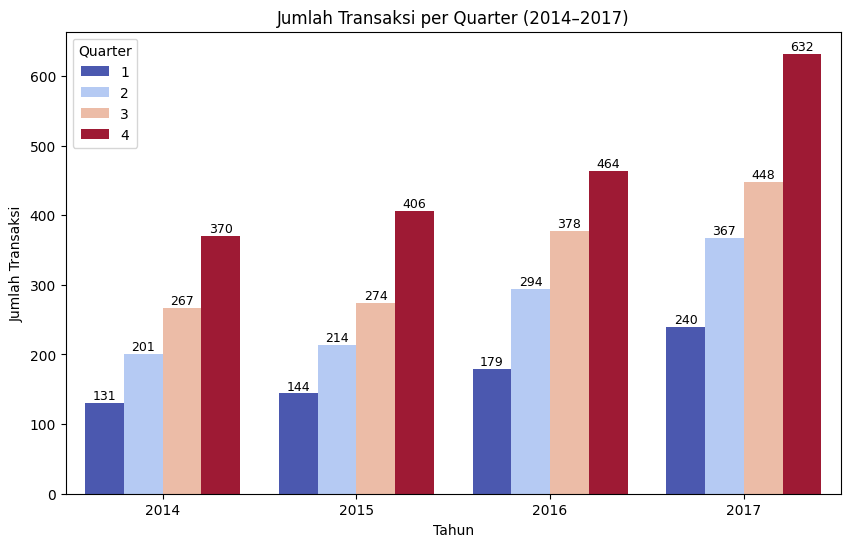

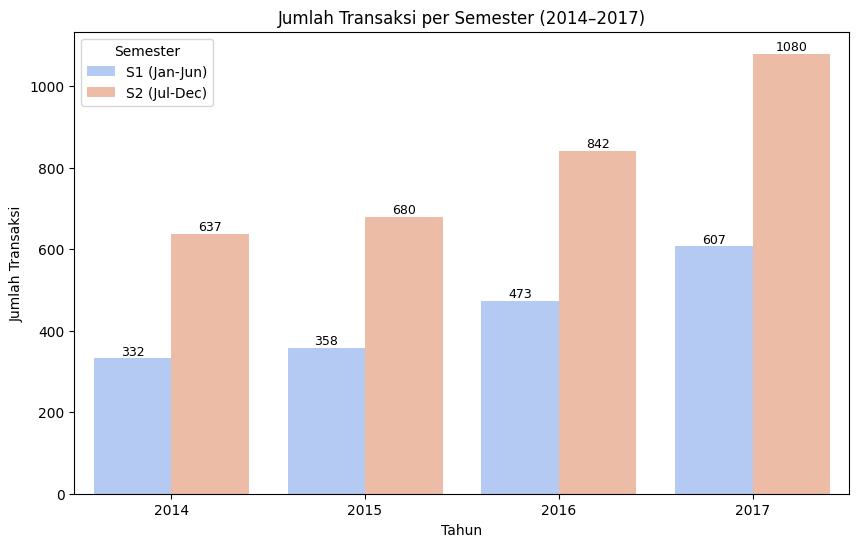

In [ ]:
# Pastikan kolom tanggal sudah datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Tambahkan kolom Year, Quarter, dan Semester
df['Year'] = df['Order Date'].dt.year
df['Quarter'] = df['Order Date'].dt.quarter
df['Semester'] = np.where(df['Order Date'].dt.quarter.isin([1,2]), "S1 (Jan-Jun)", "S2 (Jul-Dec)")

# === Jumlah Transaksi per Quarter ===
transaksi_per_quarter = df.groupby(['Year','Quarter'])['Order ID'].nunique().reset_index()
transaksi_per_quarter.rename(columns={'Order ID':'Total Orders'}, inplace=True)

plt.figure(figsize=(10,6))
ax = sns.barplot(data=transaksi_per_quarter, x='Year', y='Total Orders', hue='Quarter', palette="coolwarm")
plt.title("Jumlah Transaksi per Quarter (2014–2017)")
plt.ylabel("Jumlah Transaksi")
plt.xlabel("Tahun")
plt.legend(title="Quarter")

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.show()

# === Jumlah Transaksi per Semester ===
transaksi_per_semester = df.groupby(['Year','Semester'])['Order ID'].nunique().reset_index()
transaksi_per_semester.rename(columns={'Order ID':'Total Orders'}, inplace=True)

plt.figure(figsize=(10,6))
ax = sns.barplot(data=transaksi_per_semester, x='Year', y='Total Orders', hue='Semester', palette="coolwarm")
plt.title("Jumlah Transaksi per Semester (2014–2017)")
plt.ylabel("Jumlah Transaksi")
plt.xlabel("Tahun")
plt.legend(title="Semester")

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.show()

Dari visualisasi ini, kita bisa melihat bahwa jumlah transaksi terus meningkat dari 2014 sampai 2017. Puncak transaksi selalu terjadi pada quarter 4 dan semester 2, yang menunjukkan pola musiman di akhir tahun. Pada tahun 2017, terjadi lonjakan transaksi yang sangat besar dibanding tahun-tahun sebelumnya. Hal ini menunjukkan adanya peluang besar di periode akhir tahun, sehingga strategi bisnis sebaiknya difokuskan pada semester 2 dan quarter 4 untuk hasil yang maksimal.

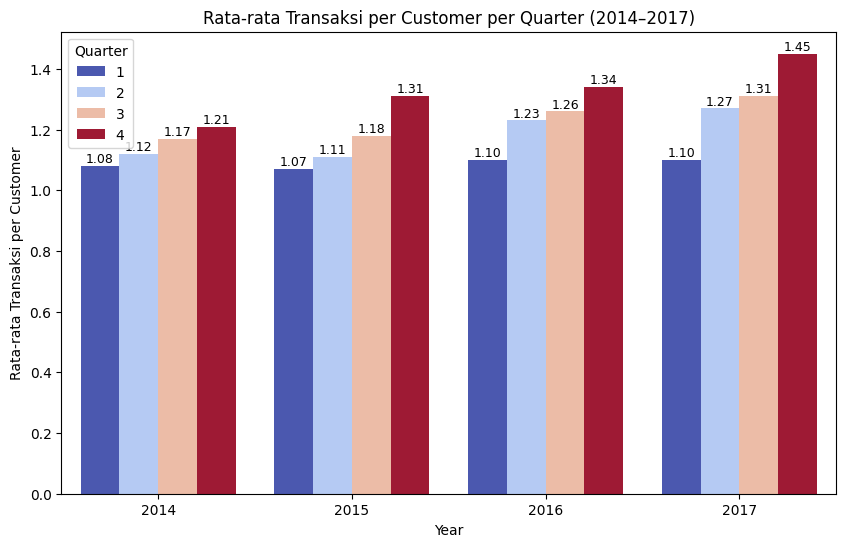

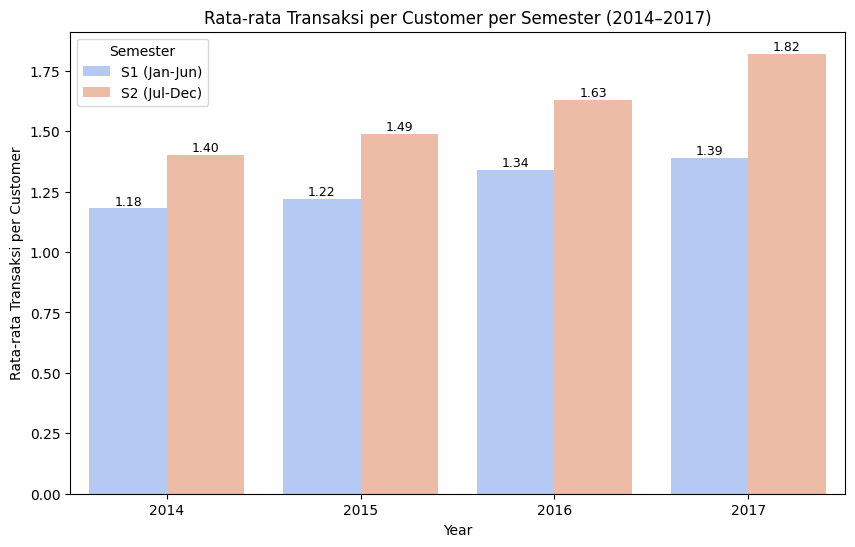

In [ ]:
# === Rata-rata Transaksi per Quarter ===
orders_per_quarter = df.groupby(['Year','Quarter'])['Order ID'].nunique().reset_index()
customers_per_quarter = df.groupby(['Year','Quarter'])['Customer ID'].nunique().reset_index()

avg_orders_quarter = pd.merge(orders_per_quarter, customers_per_quarter, on=['Year','Quarter'])
avg_orders_quarter.rename(columns={'Order ID':'Total Orders','Customer ID':'Unique Customers'}, inplace=True)
avg_orders_quarter['Avg Orders per Customer'] = round(avg_orders_quarter['Total Orders'] / avg_orders_quarter['Unique Customers'], 2)

# Visualisasi rata-rata transaksi per quarter
plt.figure(figsize=(10,6))
ax = sns.barplot(data=avg_orders_quarter, x='Year', y='Avg Orders per Customer', hue='Quarter', palette="coolwarm")
plt.title("Rata-rata Transaksi per Customer per Quarter (2014–2017)")
plt.ylabel("Rata-rata Transaksi per Customer")
plt.xlabel("Year")

# Anotasi
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

# === Rata-rata Transaksi per Semester ===
orders_per_semester = df.groupby(['Year','Semester'])['Order ID'].nunique().reset_index()
customers_per_semester = df.groupby(['Year','Semester'])['Customer ID'].nunique().reset_index()

avg_orders_semester = pd.merge(orders_per_semester, customers_per_semester, on=['Year','Semester'])
avg_orders_semester.rename(columns={'Order ID':'Total Orders','Customer ID':'Unique Customers'}, inplace=True)
avg_orders_semester['Avg Orders per Customer'] = round(avg_orders_semester['Total Orders'] / avg_orders_semester['Unique Customers'], 2)

# Visualisasi rata-rata transaksi per semester
plt.figure(figsize=(10,6))
ax = sns.barplot(data=avg_orders_semester, x='Year', y='Avg Orders per Customer', hue='Semester', palette="coolwarm")
plt.title("Rata-rata Transaksi per Customer per Semester (2014–2017)")
plt.ylabel("Rata-rata Transaksi per Customer")
plt.xlabel("Year")

# Anotasi
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()

Rata-rata transaksi per customer meningkat stabil tiap tahun, dengan lonjakan terbesar di 2017. Puncaknya selalu terjadi di quarter 4 dan semester 2, yang menegaskan adanya pola musiman di akhir tahun. Artinya, pelanggan lebih sering bertransaksi di periode tersebut sehingga strategi promosi dan penjualan sebaiknya difokuskan pada paruh kedua tahun.

#### Jumlah Customer & Rata-Rata Transaksi per Segment / Customer

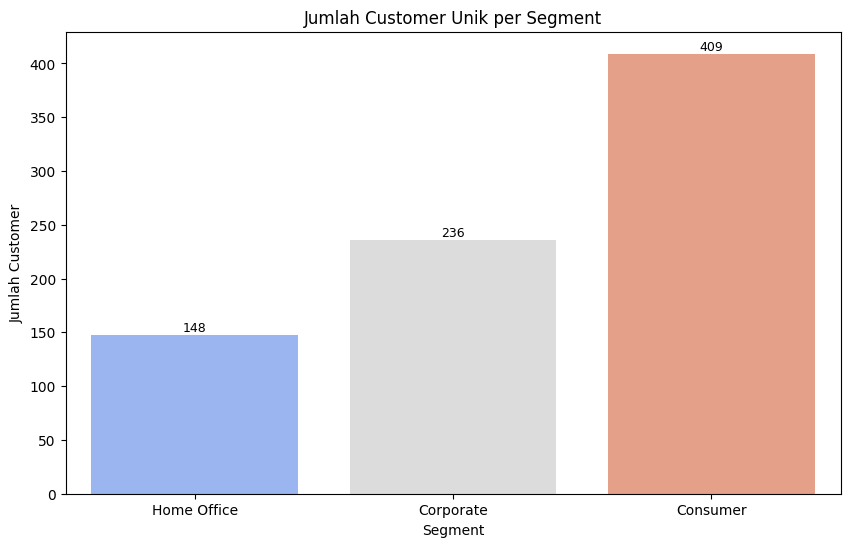

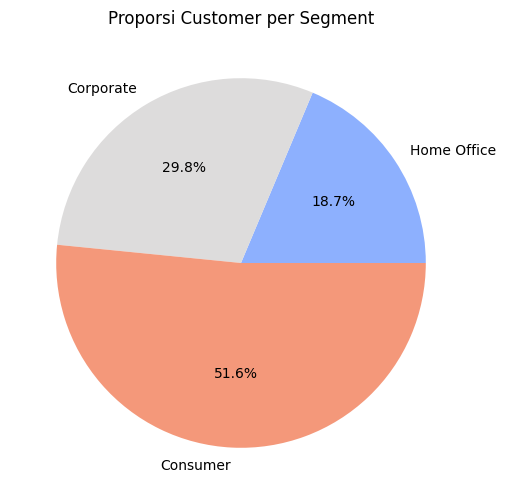

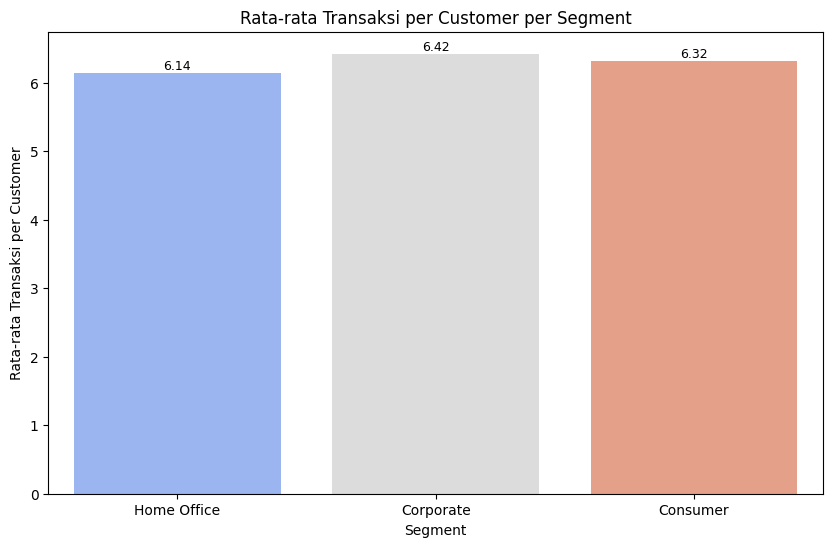

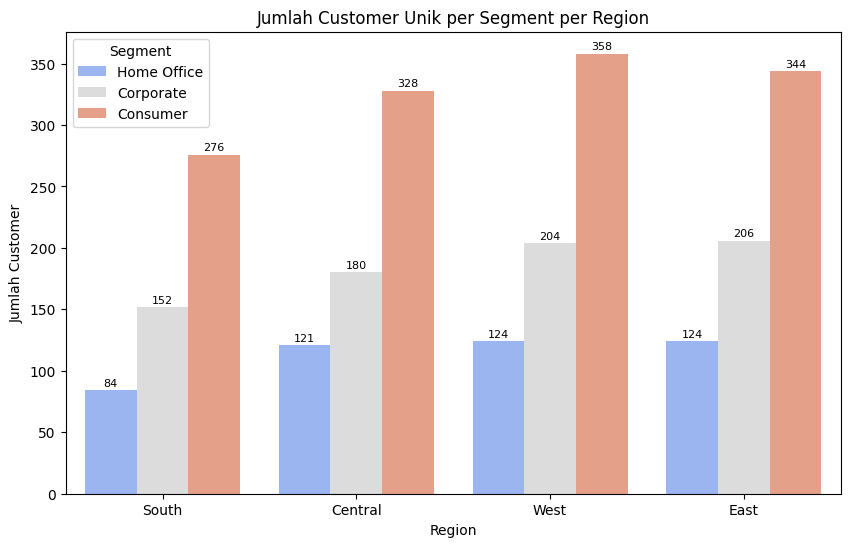

In [ ]:
# === Jumlah Customer Unik per Segment ===
customers_per_segment = df.groupby('Segment')['Customer ID'].nunique().reset_index()
customers_per_segment.rename(columns={'Customer ID':'Unique Customers'}, inplace=True)

# Hitung proporsi (%)
total_customers = customers_per_segment['Unique Customers'].sum()
customers_per_segment['Proportion (%)'] = round(
    (customers_per_segment['Unique Customers'] / total_customers) * 100, 2
)

# === Rata-rata Transaksi per Customer ===
orders_per_segment = df.groupby('Segment')['Order ID'].nunique().reset_index()
orders_per_segment.rename(columns={'Order ID':'Total Orders'}, inplace=True)

# Gabungkan
segment_stats = pd.merge(customers_per_segment, orders_per_segment, on='Segment')
segment_stats['Avg Orders per Customer'] = round(
    segment_stats['Total Orders'] / segment_stats['Unique Customers'], 2
)

# Sort data ascending by Unique Customers
segment_stats = segment_stats.sort_values('Unique Customers', ascending=True)

# === Visualisasi ===

## Bar Chart - Jumlah Customer Unik (sorted)
plt.figure(figsize=(10,6))
ax = sns.barplot(data=segment_stats, x='Segment', y='Unique Customers', palette="coolwarm",
                 order=segment_stats['Segment'])
plt.title("Jumlah Customer Unik per Segment")
plt.ylabel("Jumlah Customer")
plt.xlabel("Segment")
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.show()

## Pie Chart - Proporsi Customer
plt.figure(figsize=(8,6))
plt.pie(segment_stats['Unique Customers'],
        labels=segment_stats['Segment'],
        autopct='%1.1f%%',
        colors=sns.color_palette("coolwarm", len(segment_stats)))
plt.title("Proporsi Customer per Segment")
plt.show()

## Bar Chart - Rata-rata Transaksi per Customer (sorted)
plt.figure(figsize=(10,6))
ax = sns.barplot(data=segment_stats, x='Segment', y='Avg Orders per Customer', palette="coolwarm",
                 order=segment_stats['Segment'])
plt.title("Rata-rata Transaksi per Customer per Segment")
plt.ylabel("Rata-rata Transaksi per Customer")
plt.xlabel("Segment")
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.show()

# === Segment × Region ===
seg_region = df.groupby(['Region','Segment'])['Customer ID'].nunique().reset_index()
seg_region.rename(columns={'Customer ID':'Unique Customers'}, inplace=True)

# Urutkan berdasarkan jumlah customer unik (ascending)
seg_region = seg_region.sort_values('Unique Customers', ascending=True)

plt.figure(figsize=(10,6))
ax = sns.barplot(data=seg_region, x='Region', y='Unique Customers', hue='Segment',
                 palette="coolwarm")
plt.title("Jumlah Customer Unik per Segment per Region")
plt.ylabel("Jumlah Customer")
plt.xlabel("Region")
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.legend(title="Segment")
plt.show()

Mayoritas customer berasal dari segmen Consumer, namun segmen Corporate lebih aktif dalam bertransaksi. Di sisi regional, West dan East adalah wilayah dengan jumlah customer terbanyak. Strategi bisnis sebaiknya memaksimalkan volume dari Consumer, sambil meningkatkan profitabilitas dari Corporate, khususnya di region West dan East.

#### Jumlah Customer & Rata-Rata Transaksi per Category / Product

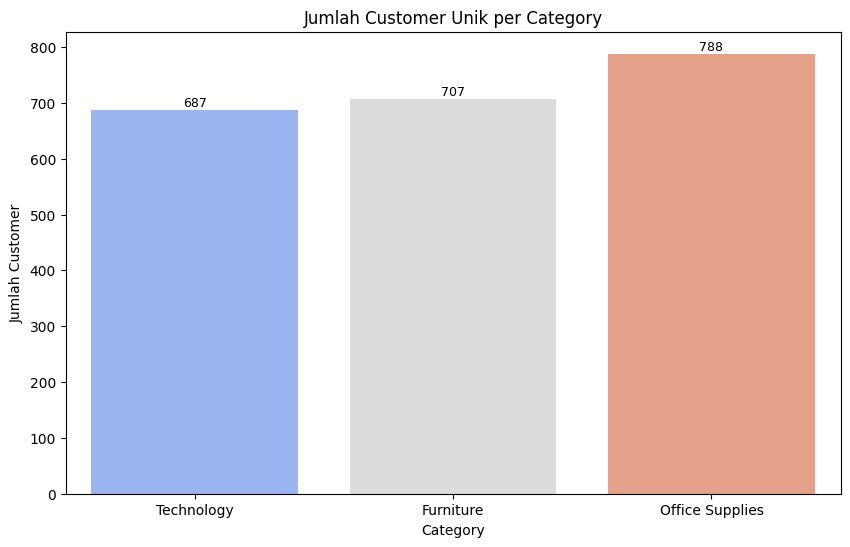

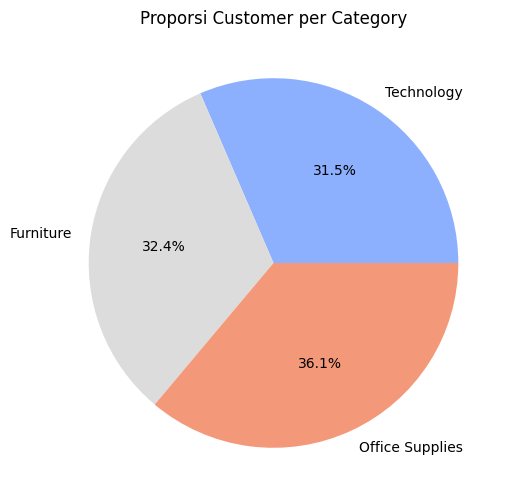

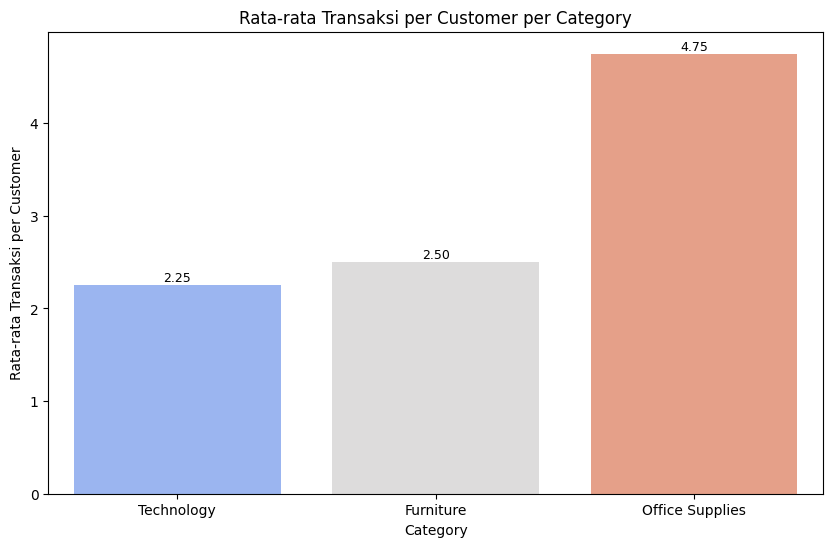

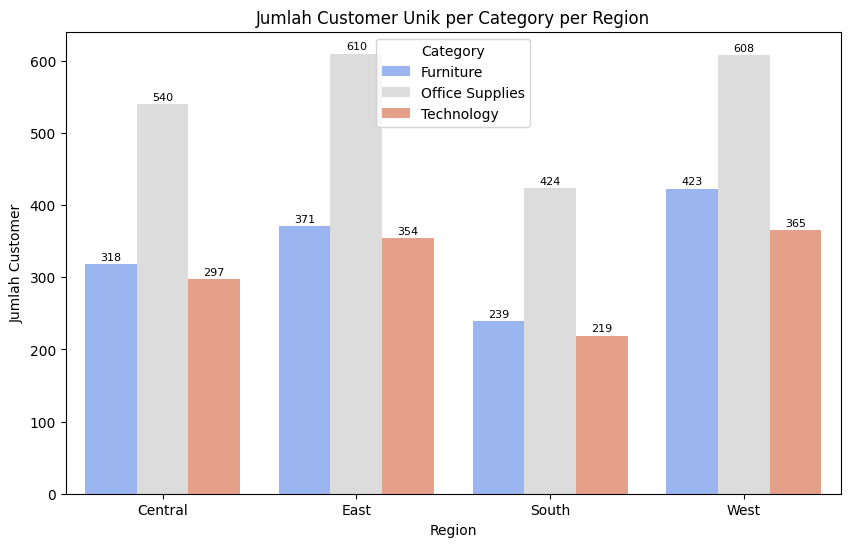

In [ ]:
# === Jumlah Customer Unik per Category ===
customers_per_category = (
    df.groupby('Category')['Customer ID'].nunique().reset_index()
    .rename(columns={'Customer ID':'Unique Customers'})
)

# Hitung proporsi (%)
total_customers_cat = customers_per_category['Unique Customers'].sum()
customers_per_category['Proportion (%)'] = round(
    (customers_per_category['Unique Customers'] / total_customers_cat) * 100, 2
)

# === Rata-rata Transaksi per Customer (pakai total orders unik) ===
orders_per_category = (
    df.groupby('Category')['Order ID'].nunique().reset_index()
    .rename(columns={'Order ID':'Total Orders'})
)

# Gabungkan
category_stats = customers_per_category.merge(orders_per_category, on='Category')
category_stats['Avg Orders per Customer'] = round(
    category_stats['Total Orders'] / category_stats['Unique Customers'], 2
)

# Sort ascending by Unique Customers (mirip segment)
category_stats = category_stats.sort_values('Unique Customers', ascending=True)

# === Visualisasi ===

## Bar Chart - Jumlah Customer Unik (sorted)
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=category_stats, x='Category', y='Unique Customers',
    palette="coolwarm", order=category_stats['Category']
)
plt.title("Jumlah Customer Unik per Category")
plt.ylabel("Jumlah Customer")
plt.xlabel("Category")
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black',
                    xytext=(0,5), textcoords='offset points')
plt.show()

## Pie Chart - Proporsi Customer
plt.figure(figsize=(8,6))
plt.pie(
    category_stats['Unique Customers'],
    labels=category_stats['Category'],
    autopct='%1.1f%%',
    colors=sns.color_palette("coolwarm", len(category_stats))
)
plt.title("Proporsi Customer per Category")
plt.show()

## Bar Chart - Rata-rata Transaksi per Customer (sorted)
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=category_stats, x='Category', y='Avg Orders per Customer',
    palette="coolwarm", order=category_stats['Category']
)
plt.title("Rata-rata Transaksi per Customer per Category")
plt.ylabel("Rata-rata Transaksi per Customer")
plt.xlabel("Category")
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black',
                    xytext=(0,5), textcoords='offset points')
plt.show()

# === Category × Region (mirip 'segmen per region') ===
cat_region = (
    df.groupby(['Region','Category'])['Customer ID'].nunique().reset_index()
    .rename(columns={'Customer ID':'Unique Customers'})
)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=cat_region, x='Region', y='Unique Customers', hue='Category',
    palette="coolwarm", order=cat_region['Region'].unique()
)
plt.title("Jumlah Customer Unik per Category per Region")
plt.ylabel("Jumlah Customer")
plt.xlabel("Region")
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black',
                    xytext=(0,5), textcoords='offset points')
plt.legend(title="Category")
plt.show()

Kategori Office Supplies mendominasi baik dari sisi jumlah customer maupun frekuensi transaksi, sehingga menjadi kategori paling potensial. Sementara Furniture dan Technology memiliki jumlah customer cukup besar, tetapi transaksi per customer masih lebih rendah sehingga bisa menjadi area untuk peningkatan.

### Jumlah Customer Segment x Category

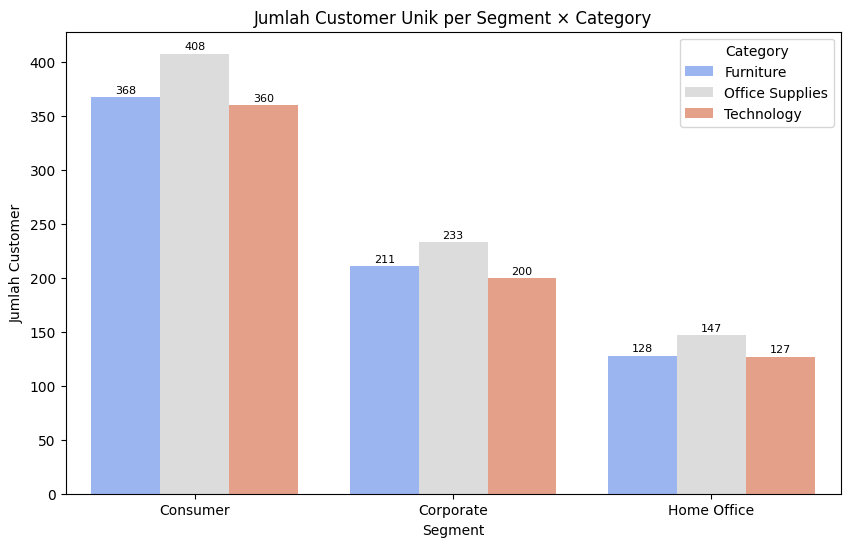

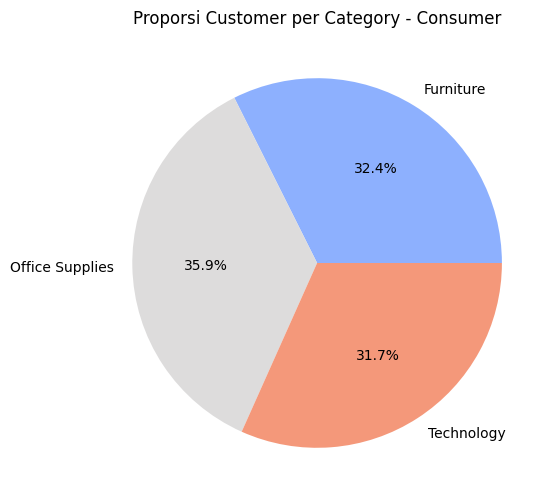

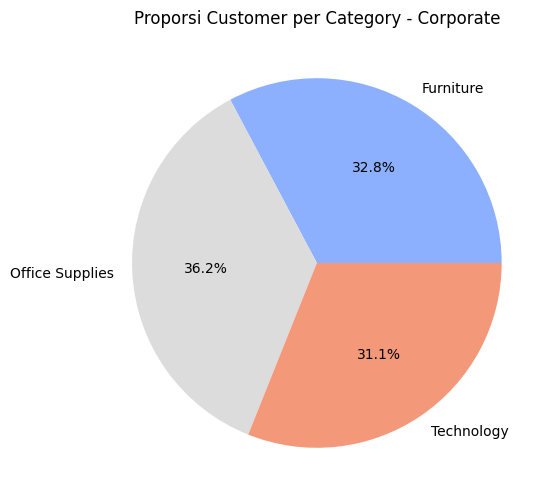

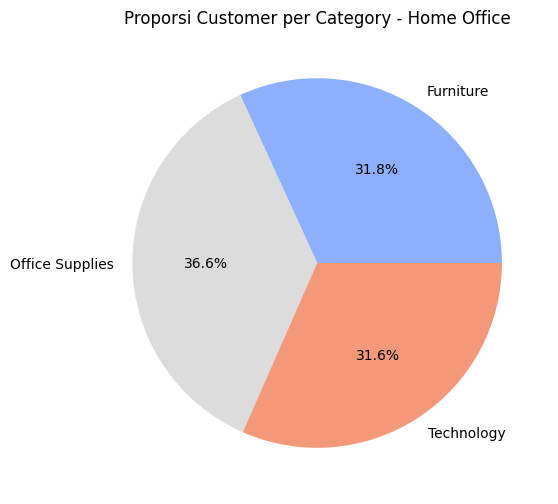

Category,Furniture,Office Supplies,Technology
Segment,,,
Consumer,368,408,360
Corporate,211,233,200
Home Office,128,147,127


In [ ]:
# Hitung jumlah customer unik per Segment × Category
seg_cat = (
    df.groupby(['Segment','Category'])['Customer ID']
      .nunique()
      .reset_index()
      .rename(columns={'Customer ID':'Unique Customers'})
)

# === Barchart Grouped ===
plt.figure(figsize=(10,6))
ax = sns.barplot(data=seg_cat, x='Segment', y='Unique Customers',
                 hue='Category', palette='coolwarm')
plt.title("Jumlah Customer Unik per Segment × Category")
plt.ylabel("Jumlah Customer")
plt.xlabel("Segment")
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black',
                    xytext=(0,5), textcoords='offset points')
plt.legend(title="Category")
plt.show()

# === Pie Chart per Segment (breakdown Category) ===
for seg in seg_cat['Segment'].unique():
    temp = seg_cat[seg_cat['Segment']==seg]
    plt.figure(figsize=(6,6))
    plt.pie(temp['Unique Customers'],
            labels=temp['Category'],
            autopct='%1.1f%%',
            colors=sns.color_palette("coolwarm", len(temp)))
    plt.title(f"Proporsi Customer per Category - {seg}")
    plt.show()

# === Pivot Tabel Ringkas ===
seg_cat_pivot = seg_cat.pivot(index='Segment', columns='Category', values='Unique Customers').fillna(0)
display(seg_cat_pivot)


Dari visualisasi ini, kita bisa melihat bahwa pasar terbesar ada di Consumer, dengan Office Supplies sebagai kategori unggulan. Namun, Furniture dan Technology juga cukup stabil di semua segmen, sehingga strategi diferensiasi produk bisa diterapkan untuk menarik minat customer yang lebih spesifik.

### Sales vs Profit Margin per Category & Segment

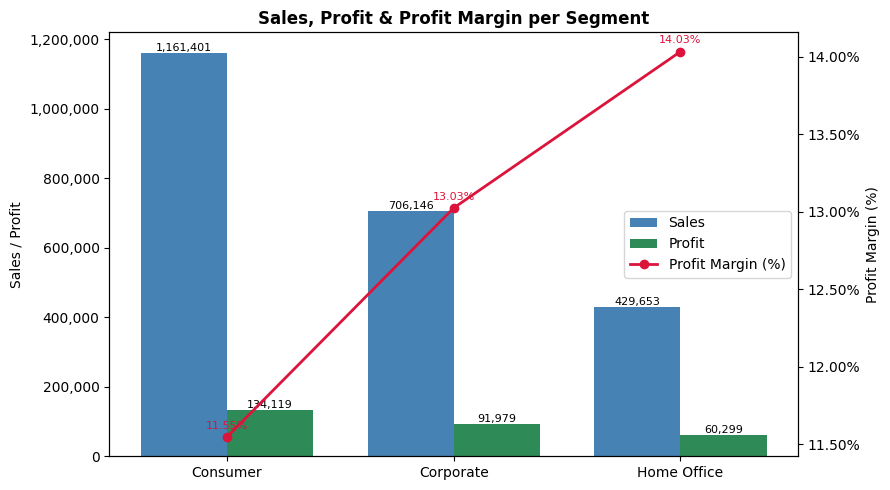

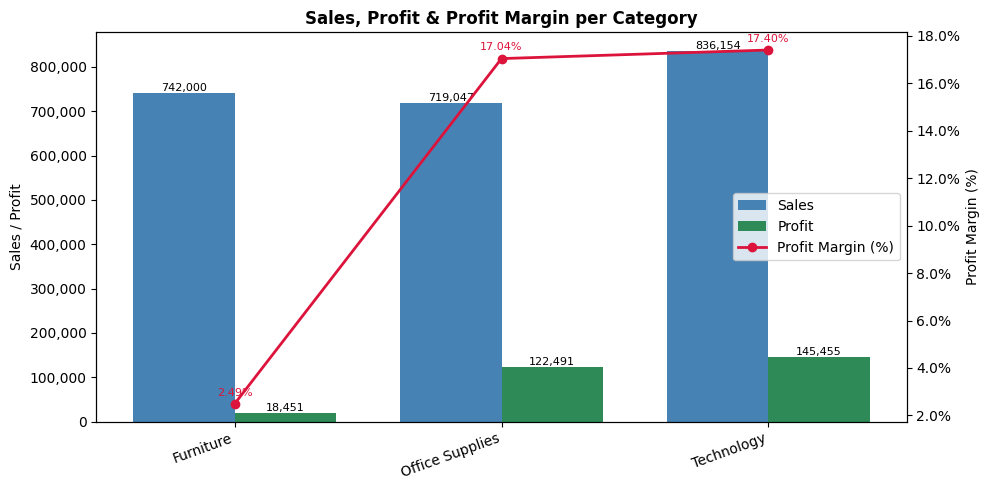

In [ ]:
import numpy as np
import matplotlib.ticker as mtick

# === Aggregate per Segment ===
seg_summary = df.groupby("Segment")[["Sales", "Profit"]].sum().reset_index()
seg_summary["Profit Margin (%)"] = (seg_summary["Profit"] / seg_summary["Sales"]) * 100

# --- Chart Segment ---
x = seg_summary["Segment"].tolist()
sales = seg_summary["Sales"].values
profit = seg_summary["Profit"].values
margin = seg_summary["Profit Margin (%)"].values

fig, ax1 = plt.subplots(figsize=(9,5))

idx = np.arange(len(x))
barw = 0.38

b1 = ax1.bar(idx - barw/2, sales, width=barw, label="Sales", color="steelblue")
b2 = ax1.bar(idx + barw/2, profit, width=barw, label="Profit", color="seagreen")

# Anotasi Sales & Profit
for bars in (b1, b2):
    for p in bars:
        h = p.get_height()
        if h > 0:
            ax1.annotate(f"{h:,.0f}",
                         (p.get_x()+p.get_width()/2, h),
                         ha="center", va="bottom", fontsize=8)

ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax1.set_ylabel("Sales / Profit")
ax1.set_xticks(idx, x)

# Line Profit Margin (%)
ax2 = ax1.twinx()
line = ax2.plot(idx, margin, marker="o", linewidth=2, color="crimson", label="Profit Margin (%)")

# Anotasi Profit Margin
for xi, yi in zip(idx, margin):
    ax2.annotate(f"{yi:.2f}%", (xi, yi),
                 textcoords="offset points", xytext=(0,6),
                 ha="center", fontsize=8, color="crimson")

ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_ylabel("Profit Margin (%)")

ax1.set_title("Sales, Profit & Profit Margin per Segment", fontsize=12, fontweight="bold")

# Legend gabungan
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc="center right")

plt.tight_layout()
plt.show()


# === Aggregate per Category ===
cat_summary = df.groupby("Category")[["Sales", "Profit"]].sum().reset_index()
cat_summary["Profit Margin (%)"] = (cat_summary["Profit"] / cat_summary["Sales"]) * 100

x = cat_summary["Category"].tolist()
sales = cat_summary["Sales"].values
profit = cat_summary["Profit"].values
margin = cat_summary["Profit Margin (%)"].values

fig, ax1 = plt.subplots(figsize=(10,5))

idx = np.arange(len(x))
barw = 0.38

b1 = ax1.bar(idx - barw/2, sales, width=barw, label="Sales", color="steelblue")
b2 = ax1.bar(idx + barw/2, profit, width=barw, label="Profit", color="seagreen")

for bars in (b1, b2):
    for p in bars:
        h = p.get_height()
        if h > 0:
            ax1.annotate(f"{h:,.0f}",
                         (p.get_x()+p.get_width()/2, h),
                         ha="center", va="bottom", fontsize=8)

ax1.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax1.set_ylabel("Sales / Profit")
ax1.set_xticks(idx, x)
ax1.set_xticklabels(x, rotation=20, ha="right")

ax2 = ax1.twinx()
line = ax2.plot(idx, margin, marker="o", linewidth=2, color="crimson", label="Profit Margin (%)")

for xi, yi in zip(idx, margin):
    ax2.annotate(f"{yi:.2f}%", (xi, yi),
                 textcoords="offset points", xytext=(0,6),
                 ha="center", fontsize=8, color="crimson")

ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_ylabel("Profit Margin (%)")

ax1.set_title("Sales, Profit & Profit Margin per Category", fontsize=12, fontweight="bold")

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc="center right")

plt.tight_layout()
plt.show()


# COHORT

### Cohort Retention Analysis Customer per Quarter / Semester

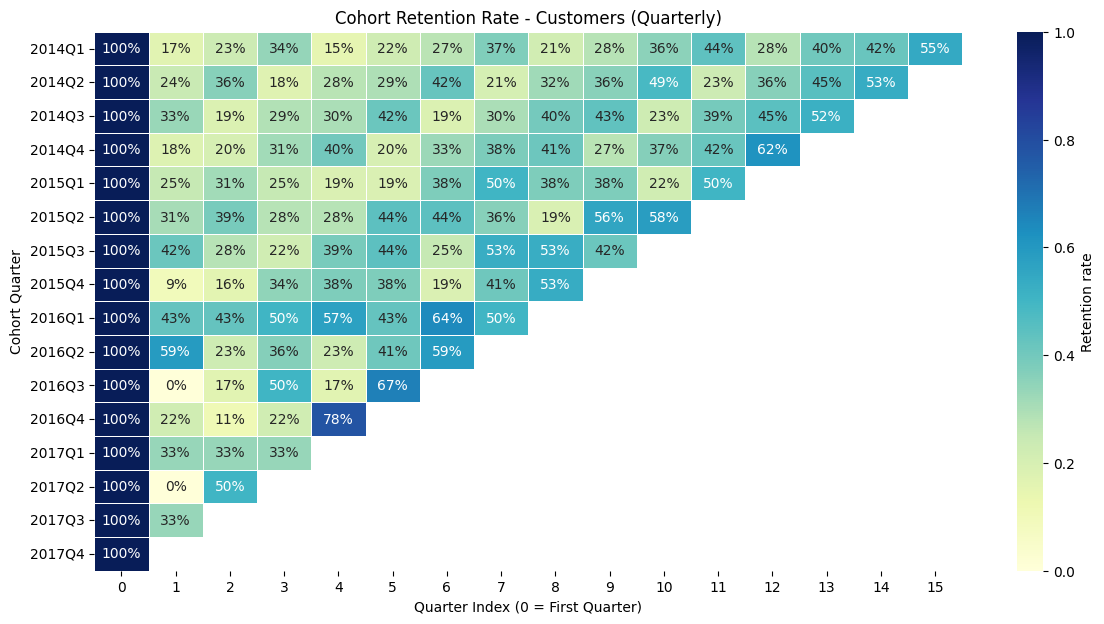

In [ ]:
# ================================================================
# STEP 1: Tentukan Cohort Quarter dan Quarter transaksi saat ini
# ================================================================
# cohort_quarter = quarter pertama kali customer melakukan transaksi
df['cohort_quarter'] = df.groupby('Customer ID')['Order Date'].transform('min').dt.to_period('Q')

# current_transaction_quarter = quarter dari setiap transaksi customer
df['current_transaction_quarter'] = df['Order Date'].dt.to_period('Q')

# Simpan subset data yang hanya berisi cohort_quarter, current_transaction_quarter, dan Customer ID
df_agg_q = df[['cohort_quarter','current_transaction_quarter','Customer ID']]

# ================================================================
# STEP 2: Hitung jumlah unique customer di tiap kombinasi
#          (cohort_quarter × current_transaction_quarter)
# ================================================================
df_count_q = (
    df_agg_q.groupby(['cohort_quarter','current_transaction_quarter'])['Customer ID']
            .nunique()  # hitung unique customer
            .reset_index()
            .rename(columns={'Customer ID':'count_user'})  # ganti nama kolom
)

# ================================================================
# STEP 3: Hitung period_distance (jarak antar quarter)
#          0 = quarter pertama (cohort), 1 = quarter berikutnya, dst
# ================================================================
df_count_q['period_distance'] = (
    (df_count_q['current_transaction_quarter'].dt.year - df_count_q['cohort_quarter'].dt.year)*4 +
    (df_count_q['current_transaction_quarter'].dt.quarter - df_count_q['cohort_quarter'].dt.quarter)
)

import numpy as np

# ================================================================
# STEP 4: Bangun grid lengkap hingga horizon & isi 0 untuk periode valid tanpa pembeli
# ================================================================

# Horizon (quarter maksimum yang ada di data transaksi saat ini)
max_curr_q = df_count_q['current_transaction_quarter'].max()

# Semua cohort yang muncul
cohorts = df_count_q['cohort_quarter'].drop_duplicates().sort_values()

# Bangun kombinasi (cohort_quarter, period_distance) sampai horizon
rows = []
for cq in cohorts:
    # jarak maksimum yang MUNGKIN terjadi untuk cohort cq sampai quarter max_curr_q
    max_dist = (max_curr_q.year - cq.year) * 4 + (max_curr_q.quarter - cq.quarter)
    for d in range(0, max_dist + 1):
        rows.append((cq, d))
full_grid = pd.DataFrame(rows, columns=['cohort_quarter','period_distance'])

# Agregasi ulang count untuk jaga-jaga
counts = (df_count_q.groupby(['cohort_quarter','period_distance'])['count_user']
                  .sum()
                  .reset_index())

# Merge → periode valid yang tidak ada pembeli akan NaN → isi 0
full_counts = full_grid.merge(counts, on=['cohort_quarter','period_distance'], how='left')
full_counts['count_user'] = full_counts['count_user'].fillna(0)

# ================================================================
# STEP 5: Pivot & hitung retention rate
# ================================================================
cohort_q = full_counts.pivot_table(index='cohort_quarter',
                                   columns='period_distance',
                                   values='count_user',
                                   aggfunc='sum')

# Urutkan baris cohort secara kronologis
cohort_q = cohort_q.sort_index()

# Bagi dengan size cohort (kolom 0); jika cohort size = 0, jadikan NaN agar bukan inf
cohort_sizes = cohort_q[0].replace({0: np.nan})
cohort_q_rate = cohort_q.divide(cohort_sizes, axis=0)

# ================================================================
# STEP 6: Visualisasi heatmap
# ================================================================
plt.figure(figsize=(14,7))
sns.heatmap(cohort_q_rate,
            annot=True, fmt='.0%', cmap='YlGnBu',
            vmin=0, vmax=1, linewidths=.5, linecolor='white',
            cbar_kws={'label':'Retention rate'},
            mask=cohort_q_rate.isna())   # hanya kosongkan yang di luar horizon / size=0
plt.title('Cohort Retention Rate - Customers (Quarterly)')
plt.xlabel('Quarter Index (0 = First Quarter)')
plt.ylabel('Cohort Quarter')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()


Dari visualisasi ini, kita bisa melihat bahwa sebagian besar customer cepat churn setelah pembelian pertama, namun ada beberapa periode (terutama 2015Q4–2016Q4) yang menunjukkan retensi kuat. Hal ini menandakan adanya faktor tertentu (misalnya promosi, produk, atau strategi layanan) yang berhasil membuat customer lebih loyal pada periode tersebut.

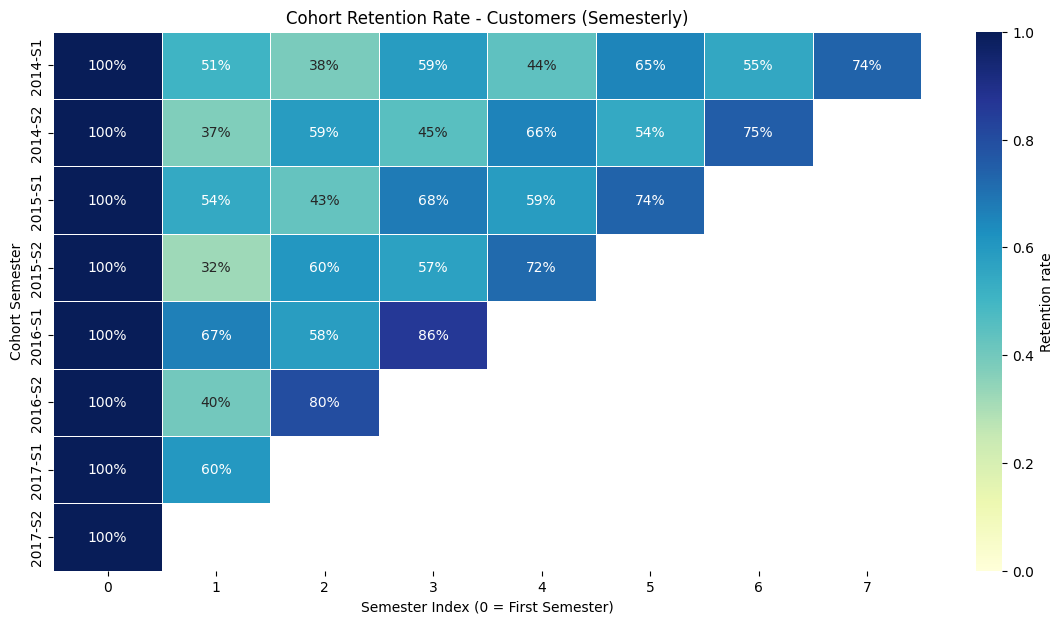

In [ ]:
# ================================================================
# STEP 1: Buat helper kolom semester
# ================================================================
month = df['Order Date'].dt.month   # ambil bulan dari Order Date
year = df['Order Date'].dt.year     # ambil tahun dari Order Date
sem = np.where(month <= 6, 1, 2)    # tentukan semester: 1 = Jan–Jun, 2 = Jul–Des

# ================================================================
# STEP 2: Tentukan Cohort Semester (semester pertama kali customer transaksi)
# ================================================================
df['cohort_sem'] = df.groupby('Customer ID')['Order Date'].transform('min')  # tanggal transaksi pertama
sem_first = np.where(df['cohort_sem'].dt.month <= 6, 1, 2)                  # semester dari transaksi pertama
df['cohort_sem'] = df['cohort_sem'].dt.year.astype(str) + '-S' + sem_first.astype(str)  # contoh "2014-S1"
# ordinal = untuk memudahkan hitung jarak antar semester → year*2 + (sem-1)
df['cohort_sem_ord'] = df['cohort_sem'].str.extract(r'(\d{4})').astype(int)[0]*2 + (sem_first-1)

# ================================================================
# STEP 3: Tentukan Current Transaction Semester (semester tiap transaksi)
# ================================================================
df['current_transaction_sem'] = year.astype(str) + '-S' + sem.astype(str)       # contoh "2015-S2"
df['current_transaction_sem_ord'] = year*2 + (sem-1)                            # ordinal semester transaksi

# Simpan subset data yang relevan
df_agg_s = df[['cohort_sem','cohort_sem_ord','current_transaction_sem',
               'current_transaction_sem_ord','Customer ID']]

# ================================================================
# STEP 4: Hitung jumlah unique customer untuk setiap kombinasi
#          (cohort_sem × current_transaction_sem)
# ================================================================
df_count_s = (
    df_agg_s.groupby(['cohort_sem','cohort_sem_ord',
                      'current_transaction_sem','current_transaction_sem_ord'])['Customer ID']
            .nunique()   # hitung unique customer
            .reset_index()
            .rename(columns={'Customer ID':'count_user'})   # ganti nama kolom
)

# ================================================================
# STEP 5: Hitung jarak semester (period_distance)
#          CohortIndex = 0 → semester cohort
#                        1 → semester berikutnya, dst
# ================================================================
df_count_s['period_distance'] = (
    df_count_s['current_transaction_sem_ord'] - df_count_s['cohort_sem_ord']
)

# ================================================================
# STEP 6: Pivot jadi matriks cohort
#          index   = cohort_sem (contoh: 2014-S1)
#          columns = period_distance
#          values  = count_user (jumlah customer unik)
# ================================================================
cohort_s = df_count_s.pivot_table(
    index='cohort_sem', columns='period_distance', values='count_user'
)

# ================================================================
# STEP 7: Hitung retention rate
#          (jumlah customer aktif di semester n ÷ cohort size)
# ================================================================
cohort_s_rate = cohort_s.divide(cohort_s[0], axis=0)

# ================================================================
# STEP 8: Urutkan index cohort secara kronologis
# ================================================================
ord_map = (df_agg_s[['cohort_sem','cohort_sem_ord']]
           .drop_duplicates()
           .sort_values('cohort_sem_ord')
           .set_index('cohort_sem')['cohort_sem_ord'])
cohort_s_rate = cohort_s_rate.loc[ord_map.index]

# ================================================================
# STEP 9: Visualisasi heatmap retention cohort semesterly
# ================================================================
plt.figure(figsize=(14,7))
sns.heatmap(cohort_s_rate, annot=True, fmt='.0%', cmap='YlGnBu',
            vmin=0, vmax=1, linewidths=.5, linecolor='white',
            cbar_kws={'label':'Retention rate'})
plt.title('Cohort Retention Rate - Customers (Semesterly)')
plt.xlabel('Semester Index (0 = First Semester)')
plt.ylabel('Cohort Semester')
plt.show()

Dari visualisasi ini, kita bisa melihat bahwa secara keseluruhan, retensi customer lebih stabil jika dilihat per semester. Beberapa periode (seperti 2015-S2 dan 2016-S1) berhasil menjaga loyalitas customer dengan sangat baik, bahkan hingga 3–4 tahun. Ini menunjukkan adanya faktor strategi atau kondisi khusus di periode tersebut yang efektif meningkatkan customer loyalty.

### Cohort Retention Analysis by Segment / Customer

In [ ]:
# Step 0: parsing date
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Step 1: Tentukan Cohort Semester (berdasarkan transaksi pertama customer dalam segment tsb.)
# definisi semester (1=Jan-Jun, 2=Jul-Dec)
month = df['Order Date'].dt.month
year  = df['Order Date'].dt.year
sem   = np.where(month <= 6, 1, 2)

df['current_sem'] = year.astype(str) + '-S' + sem.astype(str)
df['current_sem_ord'] = year*2 + (sem-1)

# untuk tiap customer + segment → semester pertama dia muncul
first_sem = (
    df.groupby(['Segment','Customer ID'])
      .agg(first_date=('Order Date','min'))
      .reset_index()
)

first_month = first_sem['first_date'].dt.month
first_year  = first_sem['first_date'].dt.year
first_sem['CohortSemLabel'] = first_year.astype(str) + '-S' + np.where(first_month<=6,1,2).astype(str)
first_sem['CohortSemOrd']   = first_year*2 + np.where(first_month<=6,1,2)-1

# merge cohort info ke df utama
df_seg = df.merge(first_sem[['Segment','Customer ID','CohortSemLabel','CohortSemOrd']],
                  on=['Segment','Customer ID'], how='left')

# Step 2: hitung CohortIndex (semester distance)
df_seg['CohortIndex'] = df_seg['current_sem_ord'] - df_seg['CohortSemOrd']

# Step 3: agregasi → hitung unique customer tiap cohort-semester
df_count_s = (
    df_seg.groupby(['Segment','CohortSemLabel','CohortSemOrd','current_sem','current_sem_ord','CohortIndex'])['Customer ID']
          .nunique()
          .reset_index()
          .rename(columns={'Customer ID':'count_user'})
)

# Step 4: pivot jadi retention matrix per segment (isi 0 utk periode yg ada tapi pembeli=0; NaN utk yg belum waktunya)
cohort_retention_segments = {}

for seg in df_count_s['Segment'].unique():
    temp = df_count_s[df_count_s['Segment'] == seg].copy()

    # Horizon data (semester maksimum yang ada di segment ini)
    max_current_ord = temp['current_sem_ord'].max()

    # Daftar cohort (label + ordinal) unik di segment ini
    cohorts = temp[['CohortSemLabel', 'CohortSemOrd']].drop_duplicates()

    # Bangun grid lengkap CohortSemLabel x CohortIndex sampai horizon
    rows = []
    for _, r in cohorts.iterrows():
        # maksimum CohortIndex yang "mungkin terjadi" untuk cohort ini (sampai horizon data)
        max_idx_possible = int(max_current_ord - r['CohortSemOrd'])
        for k in range(0, max_idx_possible + 1):
            rows.append((r['CohortSemLabel'], r['CohortSemOrd'], k))
    full_grid = pd.DataFrame(rows, columns=['CohortSemLabel', 'CohortSemOrd', 'CohortIndex'])

    # Ambil hitungan unik user per CohortSemLabel & CohortIndex (agregasi ulang agar bersih)
    counts = (
        temp.groupby(['CohortSemLabel', 'CohortIndex'])['count_user']
            .sum()
            .reset_index()
    )

    # Merge grid dengan counts → periode yang ada tapi nol pembeli akan jadi NaN lalu kita isi 0
    temp_full = full_grid.merge(counts, on=['CohortSemLabel', 'CohortIndex'], how='left')
    temp_full['count_user'] = temp_full['count_user'].fillna(0)  # 0% utk periode yang ada tapi 0 pembeli

    # Pivot ke bentuk matrix (baris = CohortSemLabel; kolom = CohortIndex)
    cohort = temp_full.pivot_table(index='CohortSemLabel',
                                   columns='CohortIndex',
                                   values='count_user',
                                   aggfunc='sum')

    # Urutkan baris berdasarkan ordinal cohort
    order_idx = (
        cohorts.sort_values('CohortSemOrd')['CohortSemLabel']
    )
    cohort = cohort.loc[order_idx]

    # Hitung retention rate (bagi baris per kolom 0)
    cohort_rate = cohort.divide(cohort[0].replace({0: np.nan}), axis=0)

    # Simpan
    cohort_retention_segments[seg] = cohort_rate

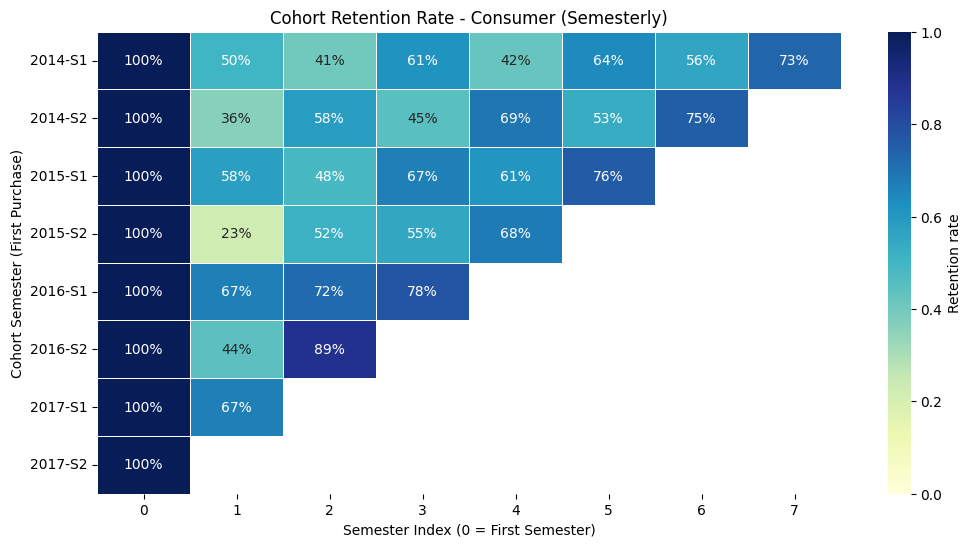

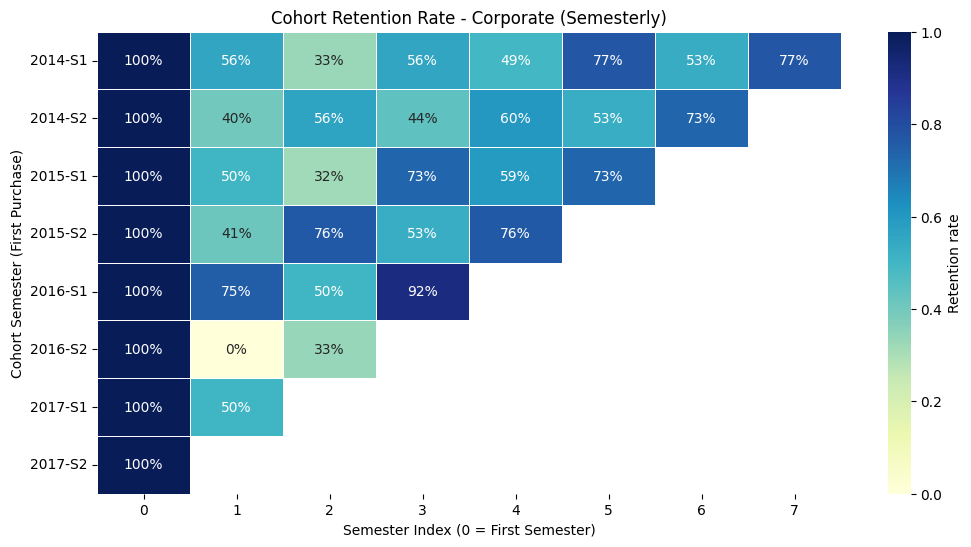

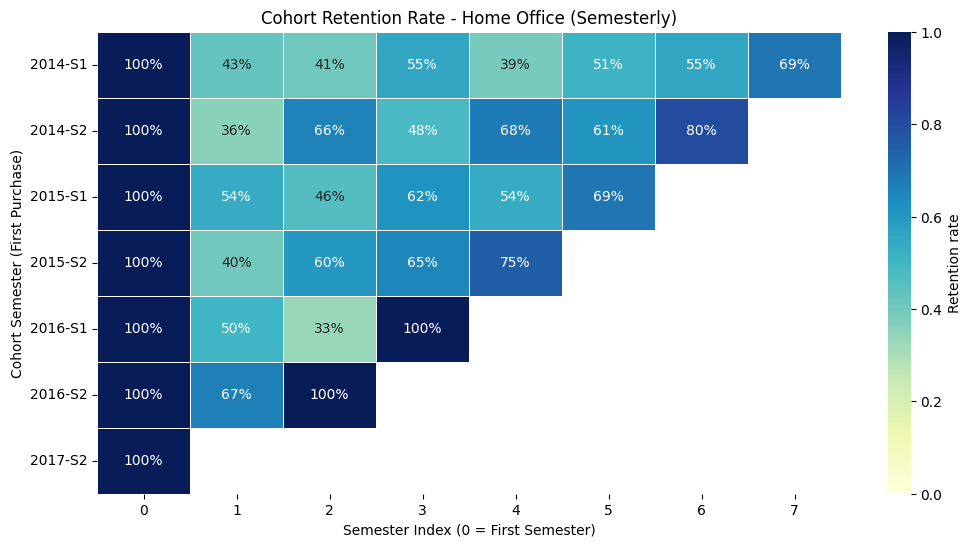

In [ ]:
# Visualisasi
for seg, matrix in cohort_retention_segments.items():
    plt.figure(figsize=(12,6))
    sns.heatmap(matrix, annot=True, fmt='.0%', cmap='YlGnBu', vmin=0, vmax=1,
                linewidths=.5, linecolor='white',
                cbar_kws={'label':'Retention rate'},
                mask=matrix.isna())  # NaN = dikosongkan
    plt.title(f'Cohort Retention Rate - {seg} (Semesterly)')
    plt.xlabel('Semester Index (0 = First Semester)')
    plt.ylabel('Cohort Semester (First Purchase)')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.show()


## Per Segment

Home Office → Retensi stabil >50% sejak awal. Pola belanja bertahap (meja → kursi → aksesori). Strategi: cross-selling, bundling, loyalty.

Corporate → Retensi paling tinggi (>70%), konsisten karena kontrak B2B rutin. Strategi: layanan premium, kontrak jangka panjang, eksklusif.

Consumer → Retensi fluktuatif, dipengaruhi musiman (liburan, diskon). Strategi: kampanye musiman, flash sale, loyalty berbasis poin.

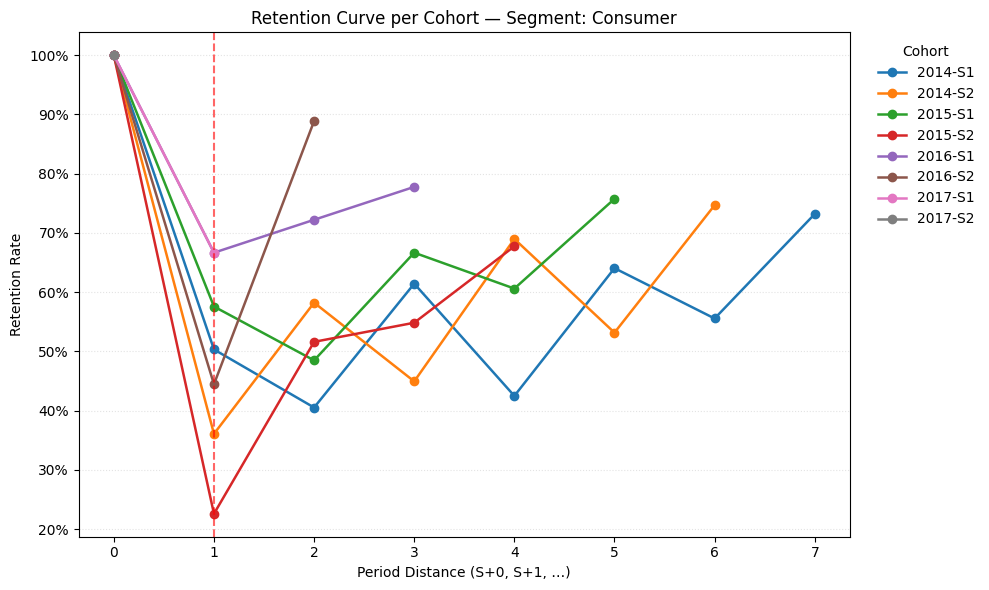

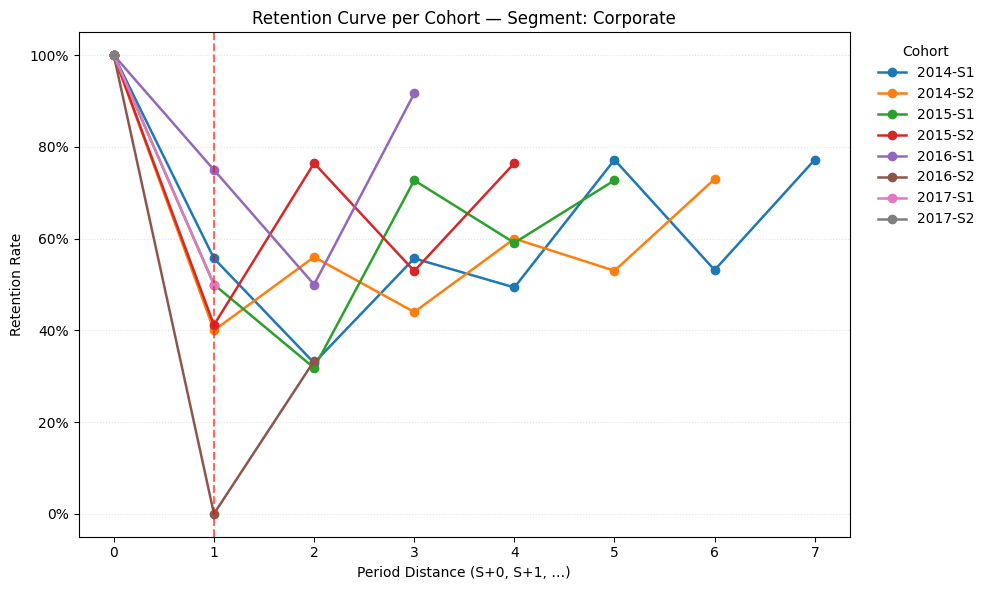

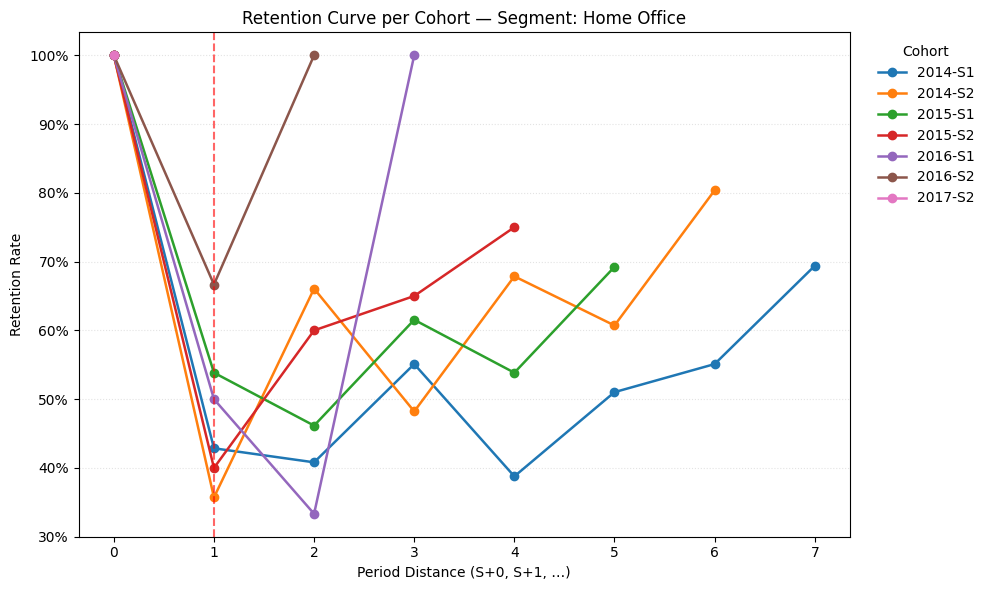

In [ ]:
from matplotlib.ticker import PercentFormatter

# === Consumer ===
mat = cohort_retention_segments['Consumer'].copy()
long_df = (
    mat.reset_index()
       .melt(id_vars='CohortSemLabel', var_name='period_distance', value_name='retention')
       .dropna()
)
long_df['period_distance'] = long_df['period_distance'].astype(int)

plt.figure(figsize=(10,6))
for coh, sub in long_df.groupby('CohortSemLabel'):
    sub = sub.sort_values('period_distance')
    plt.plot(sub['period_distance'], sub['retention'], marker='o', linewidth=1.8, label=coh)

plt.axvline(x=1, color='red', linestyle='--', alpha=0.6)  # garis churn awal
plt.title("Retention Curve per Cohort — Segment: Consumer")
plt.xlabel("Period Distance (S+0, S+1, …)")
plt.ylabel("Retention Rate")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.xticks(np.arange(long_df['period_distance'].min(), long_df['period_distance'].max()+1))
plt.grid(axis='y', linestyle=':', alpha=0.35)
plt.legend(title='Cohort', bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)
plt.tight_layout()
plt.show()


# === Corporate ===
mat = cohort_retention_segments['Corporate'].copy()
long_df = (
    mat.reset_index()
       .melt(id_vars='CohortSemLabel', var_name='period_distance', value_name='retention')
       .dropna()
)
long_df['period_distance'] = long_df['period_distance'].astype(int)

plt.figure(figsize=(10,6))
for coh, sub in long_df.groupby('CohortSemLabel'):
    sub = sub.sort_values('period_distance')
    plt.plot(sub['period_distance'], sub['retention'], marker='o', linewidth=1.8, label=coh)

plt.axvline(x=1, color='red', linestyle='--', alpha=0.6)
plt.title("Retention Curve per Cohort — Segment: Corporate")
plt.xlabel("Period Distance (S+0, S+1, …)")
plt.ylabel("Retention Rate")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.xticks(np.arange(long_df['period_distance'].min(), long_df['period_distance'].max()+1))
plt.grid(axis='y', linestyle=':', alpha=0.35)
plt.legend(title='Cohort', bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)
plt.tight_layout()
plt.show()


# === Home Office ===
mat = cohort_retention_segments['Home Office'].copy()
long_df = (
    mat.reset_index()
       .melt(id_vars='CohortSemLabel', var_name='period_distance', value_name='retention')
       .dropna()
)
long_df['period_distance'] = long_df['period_distance'].astype(int)

plt.figure(figsize=(10,6))
for coh, sub in long_df.groupby('CohortSemLabel'):
    sub = sub.sort_values('period_distance')
    plt.plot(sub['period_distance'], sub['retention'], marker='o', linewidth=1.8, label=coh)

plt.axvline(x=1, color='red', linestyle='--', alpha=0.6)
plt.title("Retention Curve per Cohort — Segment: Home Office")
plt.xlabel("Period Distance (S+0, S+1, …)")
plt.ylabel("Retention Rate")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.xticks(np.arange(long_df['period_distance'].min(), long_df['period_distance'].max()+1))
plt.grid(axis='y', linestyle=':', alpha=0.35)
plt.legend(title='Cohort', bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)
plt.tight_layout()
plt.show()


### Cohort Retention Analysis by Category / Product (Period by Quarter & Semester)

#### Period Semester

In [ ]:
# Step 0: parsing date
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Step 1: Tentukan current semester (Jan–Jun = S1, Jul–Dec = S2)
month = df['Order Date'].dt.month
year  = df['Order Date'].dt.year
sem   = np.where(month <= 6, 1, 2)

df['current_sem'] = year.astype(str) + '-S' + sem.astype(str)
df['current_sem_ord'] = year*2 + (sem-1)

# Untuk tiap customer + category → semester pertama kali transaksi
first_sem_cat = (
    df.groupby(['Category','Customer ID'])
      .agg(first_date=('Order Date','min'))
      .reset_index()
)

first_month = first_sem_cat['first_date'].dt.month
first_year  = first_sem_cat['first_date'].dt.year
first_sem_cat['CohortSemLabel'] = first_year.astype(str) + '-S' + np.where(first_month<=6,1,2).astype(str)
first_sem_cat['CohortSemOrd']   = first_year*2 + (np.where(first_month<=6,1,2)-1)

# Merge cohort info ke df utama
df_cat = df.merge(first_sem_cat[['Category','Customer ID','CohortSemLabel','CohortSemOrd']],
                  on=['Category','Customer ID'], how='left')

# Step 2: Hitung CohortIndex
df_cat['CohortIndex'] = df_cat['current_sem_ord'] - df_cat['CohortSemOrd']

# Step 3: Agregasi → hitung unique customers tiap cohort-semester
df_count_cat = (
    df_cat.groupby(['Category','CohortSemLabel','CohortSemOrd','current_sem','current_sem_ord','CohortIndex'])['Customer ID']
          .nunique()
          .reset_index()
          .rename(columns={'Customer ID':'count_user'})
)

# Step 4: Pivot retention matrix per category
cohort_retention_categories = {}
for cat in df_count_cat['Category'].unique():
    temp = df_count_cat[df_count_cat['Category']==cat]
    cohort = temp.pivot_table(index='CohortSemLabel',
                              columns='CohortIndex',
                              values='count_user')
    cohort_rate = cohort.divide(cohort[0], axis=0)

    # urutkan berdasarkan ordinal
    order_idx = (temp[['CohortSemLabel','CohortSemOrd']].drop_duplicates()
                 .sort_values('CohortSemOrd')['CohortSemLabel'])
    cohort_rate = cohort_rate.loc[order_idx]

    cohort_retention_categories[cat] = cohort_rate


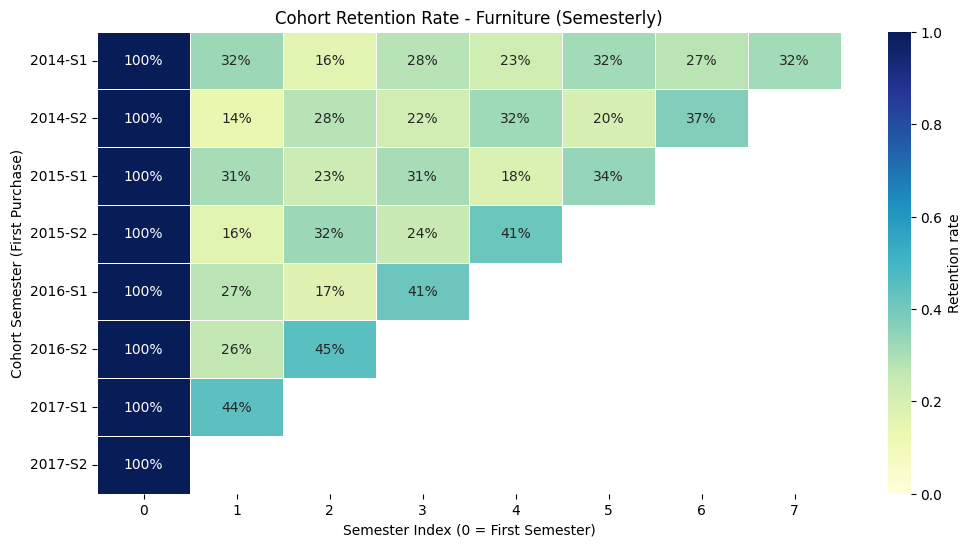

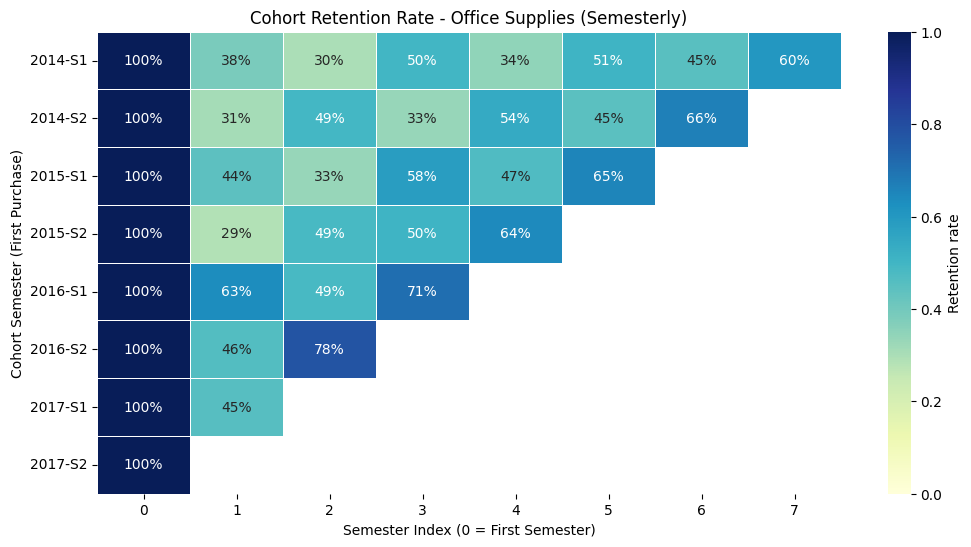

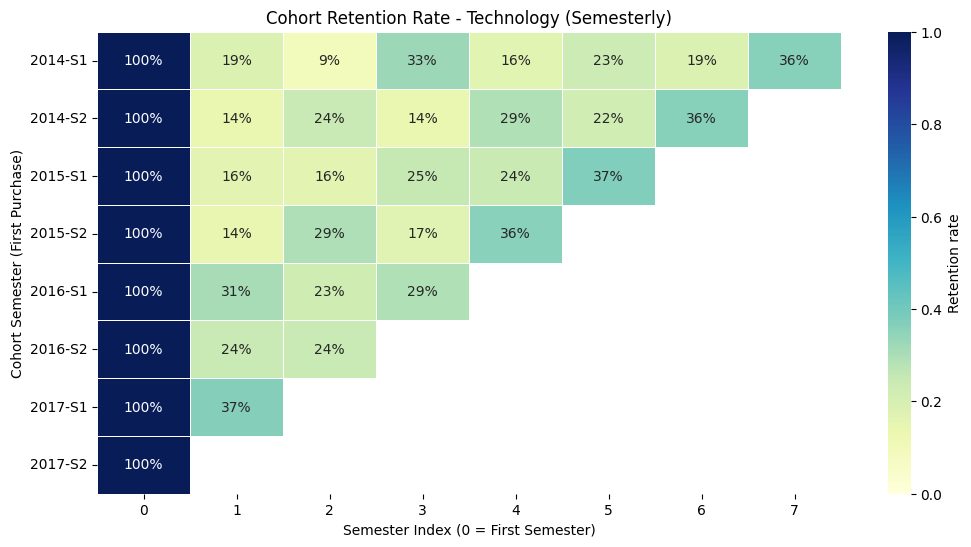

In [ ]:
for cat, matrix in cohort_retention_categories.items():
    plt.figure(figsize=(12,6))
    sns.heatmap(matrix, annot=True, fmt='.0%', cmap='YlGnBu', vmin=0, vmax=1,
                linewidths=.5, linecolor='white',
                cbar_kws={'label':'Retention rate'})
    plt.title(f'Cohort Retention Rate - {cat} (Semesterly)')
    plt.xlabel('Semester Index (0 = First Semester)')
    plt.ylabel('Cohort Semester (First Purchase)')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.show()

1. Retensi per Kategori Produk

Office Supplies → Retensi paling tinggi & stabil (40–70% hingga semester 6–7). Produk rutin.
Strategi: auto-reorder, kontrak langganan, upselling.

Furniture → Retensi rendah (14–41%), pembelian jarang.
Strategi: after-sales, garansi, bundling.

Technology → Retensi awal lemah (9–19%), tapi ada loyal group stabil di 30–36%.
Strategi: upgrade, trade-in, membership.

2. Perbedaan Retensi Antar Segmen

Corporate → Retensi terkuat (>70% awal).

Home Office → Stabil & cukup tinggi (>50%).

Consumer → Fluktuatif, menurun cepat di awal.

3. Retensi × Sales × Profit

Office Supplies → Retensi & sales stabil, profit akumulatif tinggi.

Furniture → Retensi rendah, sales besar tapi jarang, profit margin tinggi tapi tidak stabil.

Technology → Retensi lemah awal, sales tinggi saat upgrade, profit fluktuatif.

#### Period Quarter

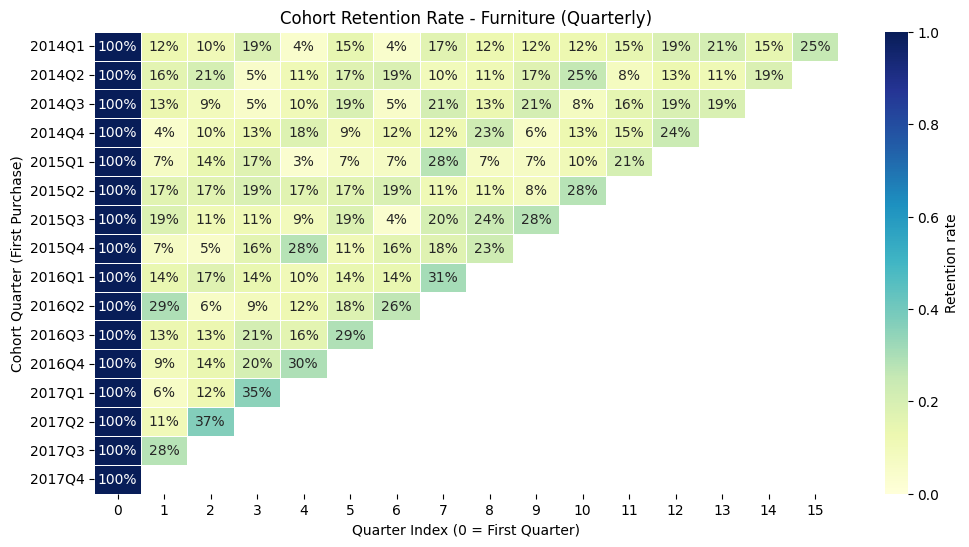

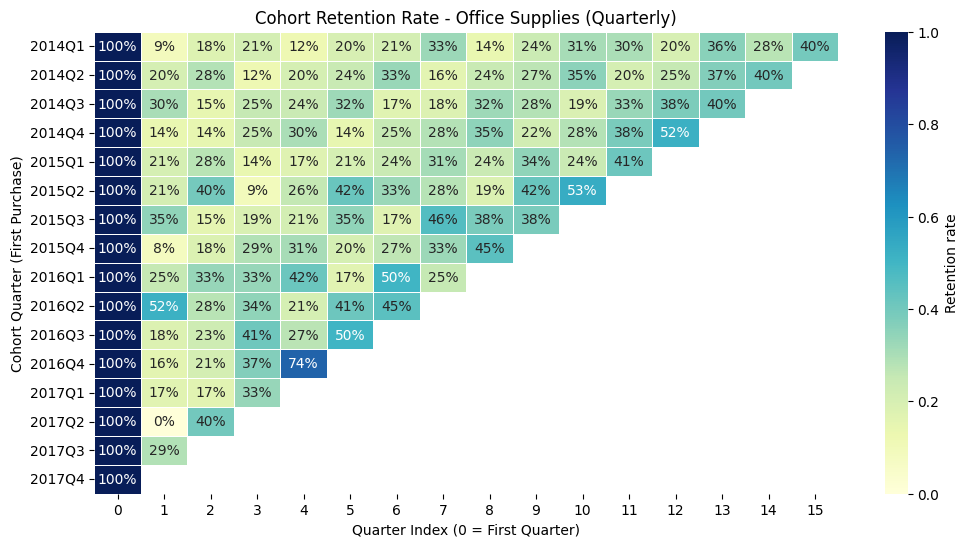

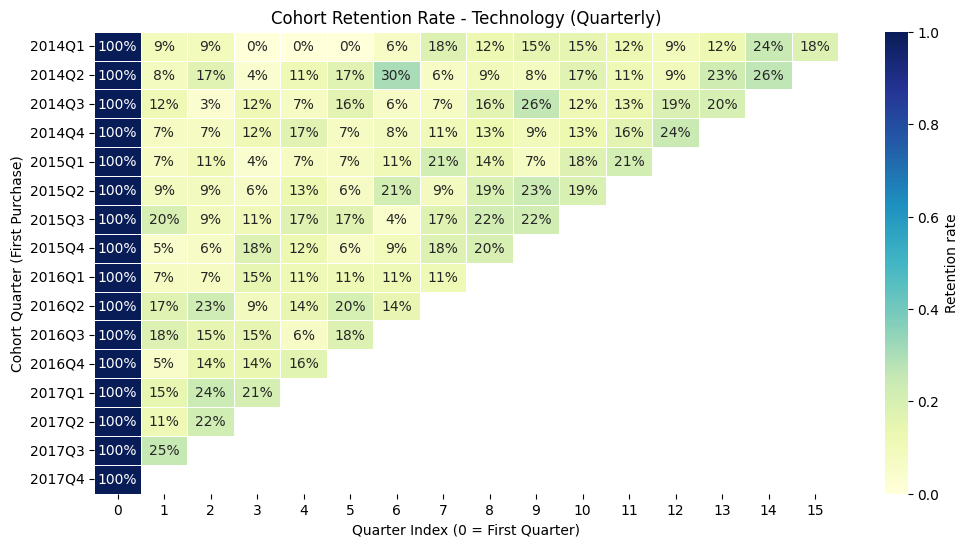

In [ ]:
# =========================
# Step 0: parsing date
# =========================
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# =========================
# Step 1: current QUARTER
# =========================
df['current_quarter'] = df['Order Date'].dt.to_period('Q')          # ex: 2014Q1
# buat ordinal quarter untuk selisih stabil lintas tahun
df['current_quarter_ord'] = (df['Order Date'].dt.year * 4) + (df['Order Date'].dt.quarter - 1)

# =========================
# Step 1b: cohort QUARTER pertama per (Category, Customer)
# =========================
first_q_cat = (
    df.groupby(['Category','Customer ID'])['Order Date']
      .min()
      .reset_index(name='first_date')
)
first_q_cat['CohortQuarter']     = first_q_cat['first_date'].dt.to_period('Q')   # ex: 2014Q1
first_q_cat['CohortQuarterOrd']  = (first_q_cat['first_date'].dt.year * 4) + (first_q_cat['first_date'].dt.quarter - 1)

# merge info cohort ke transaksi
df_cat_q = df.merge(
    first_q_cat[['Category','Customer ID','CohortQuarter','CohortQuarterOrd']],
    on=['Category','Customer ID'], how='left'
)

# =========================
# Step 2: CohortIndex (quarter distance)
# =========================
df_cat_q['CohortIndex'] = df_cat_q['current_quarter_ord'] - df_cat_q['CohortQuarterOrd']

# =========================
# Step 3: agregasi unique customers per (Category, CohortQuarter, QuarterIndex)
# =========================
df_count_cat_q = (
    df_cat_q.groupby(['Category','CohortQuarter','CohortQuarterOrd','current_quarter','current_quarter_ord','CohortIndex'])['Customer ID']
            .nunique()
            .reset_index()
            .rename(columns={'Customer ID':'count_user'})
)

# =========================
# Step 4: pivot → matriks retention per Category
# (isi 0 untuk periode valid tanpa pembeli; NaN untuk yang di luar horizon)
# =========================
cohort_retention_categories_q = {}

for cat in df_count_cat_q['Category'].unique():
    temp = df_count_cat_q[df_count_cat_q['Category'] == cat].copy()

    # Horizon (quarter maksimum yang ada untuk kategori ini)
    max_current_ord = temp['current_quarter_ord'].max()

    # Daftar cohort unik (label + ordinal) di kategori ini
    cohorts = temp[['CohortQuarter', 'CohortQuarterOrd']].drop_duplicates().sort_values('CohortQuarterOrd')

    # Bangun grid lengkap (CohortQuarter x CohortIndex) sampai horizon kategori
    rows = []
    for _, r in cohorts.iterrows():
        max_idx_possible = int(max_current_ord - r['CohortQuarterOrd'])
        for k in range(0, max_idx_possible + 1):
            rows.append((r['CohortQuarter'], r['CohortQuarterOrd'], k))
    full_grid = pd.DataFrame(rows, columns=['CohortQuarter', 'CohortQuarterOrd', 'CohortIndex'])

    # Agregasi count unik (jaga-jaga)
    counts = (temp.groupby(['CohortQuarter','CohortIndex'])['count_user']
                  .sum()
                  .reset_index())

    # Merge grid dengan counts → periode valid tanpa pembeli akan NaN → isi 0
    temp_full = full_grid.merge(counts, on=['CohortQuarter','CohortIndex'], how='left')
    temp_full['count_user'] = temp_full['count_user'].fillna(0)

    # Pivot ke matrix count
    cohort = temp_full.pivot_table(index='CohortQuarter',
                                   columns='CohortIndex',
                                   values='count_user',
                                   aggfunc='sum')

    # Urutkan baris kronologis
    order_idx = cohorts['CohortQuarter']
    cohort = cohort.loc[order_idx]

    # Retention rate; kalau cohort size (kolom 0) = 0, jadikan NaN agar tidak Inf
    cohort_size = cohort[0].replace({0: np.nan})
    cohort_rate = cohort.divide(cohort_size, axis=0)

    cohort_retention_categories_q[cat] = cohort_rate

# =========================
# Step 5: visual heatmap (NaN dimask = dikosongkan; 0% tetap terlihat)
# =========================
for cat, matrix in cohort_retention_categories_q.items():
    plt.figure(figsize=(12,6))
    sns.heatmap(matrix,
                annot=True, fmt='.0%', cmap='YlGnBu',
                vmin=0, vmax=1, linewidths=.5, linecolor='white',
                cbar_kws={'label':'Retention rate'},
                mask=matrix.isna())  # hanya kosongkan yang di luar horizon / cohort size = NaN
    plt.title(f'Cohort Retention Rate - {cat} (Quarterly)')
    plt.xlabel('Quarter Index (0 = First Quarter)')
    plt.ylabel('Cohort Quarter (First Purchase)')
    plt.xticks(rotation=0); plt.yticks(rotation=0)
    plt.show()


## Per Category

Furniture → Retensi sangat rendah (14–32%), pembelian jarang. Strategi: bundling, garansi, program repeat order.

Office Supplies → Retensi terbaik (40–70% hingga semester 6/7), kebutuhan rutin. Strategi: auto-reorder, cross/upselling, kontrak suplai.

Technology → Retensi awal rendah (14–31%), tapi stabil jangka panjang (30–36%). Strategi: after-sales, upgrade, membership.

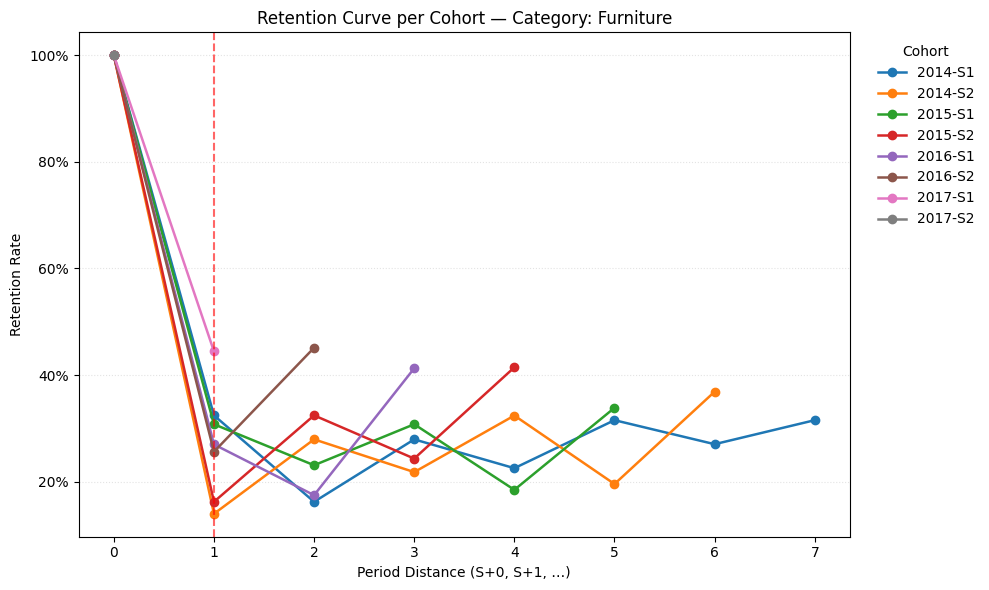

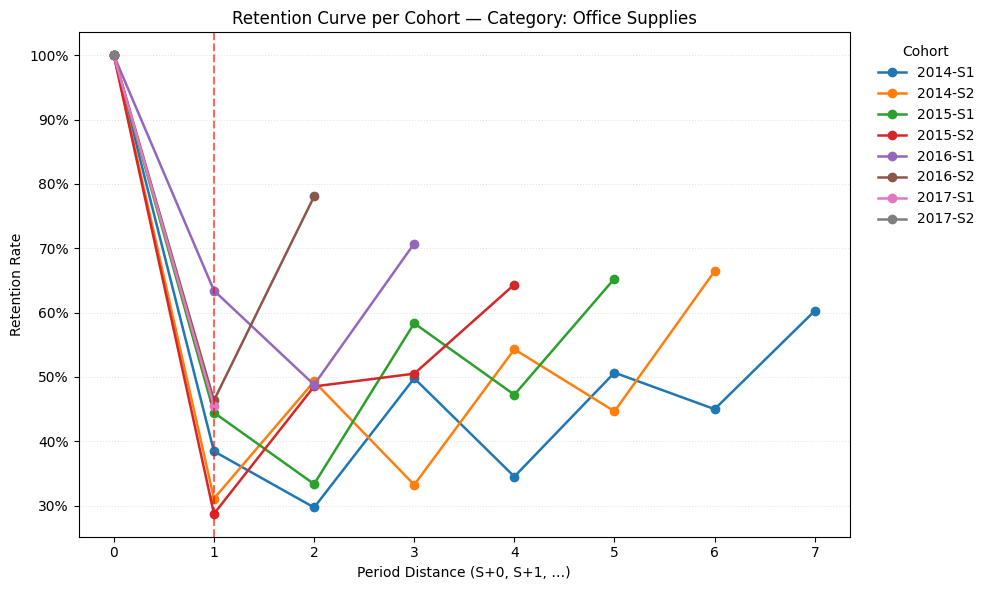

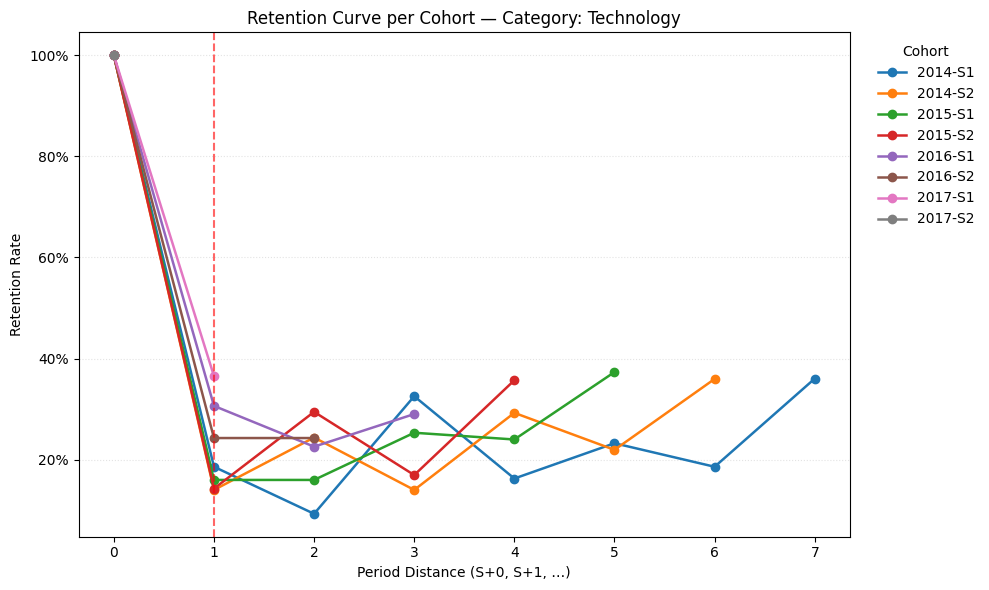

In [ ]:
# ==================== FURNITURE ====================
mat = cohort_retention_categories['Furniture'].copy()
long_df = (
    mat.reset_index()
       .melt(id_vars='CohortSemLabel', var_name='period_distance', value_name='retention')
       .dropna()
)
long_df['period_distance'] = long_df['period_distance'].astype(int)

plt.figure(figsize=(10,6))
for coh, sub in long_df.groupby('CohortSemLabel'):
    sub = sub.sort_values('period_distance')
    plt.plot(sub['period_distance'], sub['retention'], marker='o', linewidth=1.8, label=coh)

plt.axvline(x=1, color='red', linestyle='--', alpha=0.6)  # penanda S+1
plt.title("Retention Curve per Cohort — Category: Furniture")
plt.xlabel("Period Distance (S+0, S+1, …)")
plt.ylabel("Retention Rate")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.xticks(np.arange(long_df['period_distance'].min(), long_df['period_distance'].max()+1))
plt.grid(axis='y', linestyle=':', alpha=0.35)
plt.legend(title='Cohort', bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)
plt.tight_layout()
plt.show()


# ==================== OFFICE SUPPLIES ====================
mat = cohort_retention_categories['Office Supplies'].copy()
long_df = (
    mat.reset_index()
       .melt(id_vars='CohortSemLabel', var_name='period_distance', value_name='retention')
       .dropna()
)
long_df['period_distance'] = long_df['period_distance'].astype(int)

plt.figure(figsize=(10,6))
for coh, sub in long_df.groupby('CohortSemLabel'):
    sub = sub.sort_values('period_distance')
    plt.plot(sub['period_distance'], sub['retention'], marker='o', linewidth=1.8, label=coh)

plt.axvline(x=1, color='red', linestyle='--', alpha=0.6)
plt.title("Retention Curve per Cohort — Category: Office Supplies")
plt.xlabel("Period Distance (S+0, S+1, …)")
plt.ylabel("Retention Rate")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.xticks(np.arange(long_df['period_distance'].min(), long_df['period_distance'].max()+1))
plt.grid(axis='y', linestyle=':', alpha=0.35)
plt.legend(title='Cohort', bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)
plt.tight_layout()
plt.show()


# ==================== TECHNOLOGY ====================
mat = cohort_retention_categories['Technology'].copy()
long_df = (
    mat.reset_index()
       .melt(id_vars='CohortSemLabel', var_name='period_distance', value_name='retention')
       .dropna()
)
long_df['period_distance'] = long_df['period_distance'].astype(int)

plt.figure(figsize=(10,6))
for coh, sub in long_df.groupby('CohortSemLabel'):
    sub = sub.sort_values('period_distance')
    plt.plot(sub['period_distance'], sub['retention'], marker='o', linewidth=1.8, label=coh)

plt.axvline(x=1, color='red', linestyle='--', alpha=0.6)
plt.title("Retention Curve per Cohort — Category: Technology")
plt.xlabel("Period Distance (S+0, S+1, …)")
plt.ylabel("Retention Rate")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.xticks(np.arange(long_df['period_distance'].min(), long_df['period_distance'].max()+1))
plt.grid(axis='y', linestyle=':', alpha=0.35)
plt.legend(title='Cohort', bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)
plt.tight_layout()
plt.show()

- Office Supplies → kategori dengan retensi terbaik dan pelanggan paling loyal.

- Furniture → kategori dengan retensi terendah, perlu strategi khusus untuk mendorong repeat order.

- Technology → retensi awal lemah, tapi masih ada peluang dari segmen pelanggan loyal jangka panjang.

Office Supplies memiliki retensi tertinggi dan pelanggan yang loyal, sementara Furniture paling rendah karena jarang ada pembelian ulang. Technology rendah di awal namun ada segmen kecil yang bertahan lama. Dengan demikian, Office Supplies paling stabil, sedangkan Furniture dan Technology perlu strategi untuk meningkatkan retensi awal.

## INSIGHT / ANALYSIS

1. Retensi Pelanggan per Kategori Produk

- **Furniture**

  Retensi pelanggan rendah, hanya 14–32% yang kembali di semester kedua. Pola pembelian jarang/rugi, naik tipis di semester 3–4 tapi tetap rendah (<40%). → Strategi: program bundling, garansi tambahan, after-sales untuk mendorong repeat order.

- **Office Supplies**

  Retensi terbaik dibanding kategori lain, banyak cohort bertahan 40–70% hingga semester ke-6/7. Produk kebutuhan rutin sehingga loyalitas pelanggan kuat. → Strategi: auto-reorder, cross/upselling, kontrak langganan.

- **Technology**

  Retensi awal lemah (14–31%), tapi ada kelompok loyal yang bertahan stabil 30–36% di semester 6/7. → Strategi: after-sales service, program upgrade, trade-in, membership khusus.


2. Perbedaan Retensi Antar Segmen Pelanggan

- **Home Office**
  Retensi tinggi sejak awal (>50% kembali di semester 2). Stabil di tahun berikutnya, dipengaruhi tren WFH. → Strategi: cross-selling, bundling paket kerja rumah, program loyalitas.

- **Corporate**
  Retensi paling kuat, bahkan bisa >70% hingga semester 3–4. Pembelian berbasis kontrak membuat loyalitas tinggi. → Strategi: layanan premium, kontrak jangka panjang, program eksklusif korporat.

- **Consumer**
  Retensi fluktuatif. Menurun di semester awal, tetapi meningkat signifikan di tahun ke-3 (efek musiman: liburan, diskon, tahun baru). → Strategi: kampanye musiman, flash sale, program poin loyalitas.

3. Perbandingan Retensi × Sales × Profit

**Furniture**

- Retensi: paling rendah.

- Sales: besar tapi jarang (harga tinggi, frekuensi rendah).

- Profit: margin tinggi, tetapi kurang stabil karena repeat order rendah.
→ Fokus ke customer retention dengan strategi after-sales & bundling.

**Office Supplies**

- Retensi: paling stabil & tinggi.

- Sales: konsisten, volume besar karena pembelian rutin.

- Profit: akumulasi tinggi meski margin per produk relatif kecil.
→ Fokus ke volume growth dengan auto-reorder & upselling.

**Technology**

- Retensi: awal lemah, tapi ada segmen loyal.

- Sales: tinggi saat product launch / upgrade cycle.

- Profit: signifikan di periode upgrade, tetapi tidak stabil.
→ Fokus ke customer lifecycle: after-sales, trade-in, membership.


Jadi, retensi paling kuat ada di segmen Corporate & kategori Office Supplies, sedangkan yang paling lemah ada di kategori Furniture & segmen Consumer. Strategi bisnis ke depan perlu dibedakan per kategori & segmen:

- Corporate → kontrak & layanan eksklusif.

- Home Office → bundling + cross-sell.

- Consumer → kampanye musiman & loyalitas poin.

- Furniture → repeat order dengan garansi & after-sales.

- Office Supplies → auto-reorder & upselling.

- Technology → upgrade & trade-in.

# Insight Akhir
**Catatan**
* Furniture: Retensi naik di tahun ke-3, terutama semester 2–3, dipengaruhi pembelian musiman & diskon akhir tahun.
* Office Supplies: Retensi konsisten sejak tahun ke-2, didorong kebutuhan rutin sekolah dan kantor.
* Technology: Lonjakan di tahun ke-3 semester 2, karena peluncuran produk baru & promo besar.
* Home Office: Retensi tinggi sejak awal dan stabil, menunjukkan pembelian berulang untuk kebutuhan kerja di rumah.

* Corporate: Paling konsisten, naik kuat sejak tahun ke-2 berkat pola belanja kontrak & rutin.

* Consumer: Lonjakan tajam di tahun ke-3 akhir, dipengaruhi momen liburan & diskon besar.

**Strategi:**

* Momentum Musiman: Optimalkan promo akhir tahun & event global untuk Furniture & Technology.

* Siklus Anggaran & Sekolah: Fokus pada paket back-to-school & anggaran kantor di Office Supplies.

* Kebutuhan Rutin: Dorong repeat order Home Office dengan paket langganan & promo berkala.

* Loyalitas Korporasi: Perkuat Corporate dengan kontrak jangka panjang & layanan premium.

* Konsumen Musiman: Maksimalkan musim liburan dengan diskon, bundling keluarga & loyalty rewards untuk Consumer.